# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**:

1. Определить рыночную стоимость объектов недвижимости.
2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность.
3. Установить, какие факторы влияют на ценообразование стоимости квартир.

    **Ход исследования**
    
    Данные о недвижимости я получу из файла "/datasets/real_estate_data.csv". О качестве данных ничего не известно. Поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.
    
    Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки я поищу возможность исправить все ошибки данных, которые не приведут к искажению конечного результата. Далее, создам необходимые столбцы, и приступлю к проведению исследовательского анализа.
    
    Таким образом, моё исследование пройдёт в семь этапов:
    
    * Обзор данных.
    * Предобработка данных.
    * Расчёты и добавление результатов в таблицу.
    * Проведение анализа для Ленинградской области.
    * Проведение анализа для Санкт-Петербурга.
    * Различаются ли факторы, которые влияют на ценообразование стоимости квартир.
    * Написание общего вывода.

### Открываем файл с данными и изучаем общую информацию. 

In [1]:
import pandas as pd
import numpy as np

# загрузим данные из файла в датафрейм и выведем перые 5 строк
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

In [2]:
# посмотрим общую информацию о данных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Проверим наши данные на явные дубликаты. Позже в проекте все эти строки будут удалены.

In [3]:
duplicated = data[data.duplicated()]
print(duplicated)
#print(len(duplicated))

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]


В более, чем половине столбцов (14 из 22) отсутствуют значения. В данных есть 4 столбца (locality_name, is_apartment, studio и open_plan), которые являются категориальными. Столбец first_day_exposition даёт нам информацию о времени, поэтому в нём нужно будет поменять формат данных. Все остальные столбцы - количественные данные.

In [4]:
# описание значений столбцов
for col in data:
    print(col)
    print(data[col].describe())

total_images
count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64
last_price
count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64
total_area
count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64
first_day_exposition
count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object
rooms
count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.

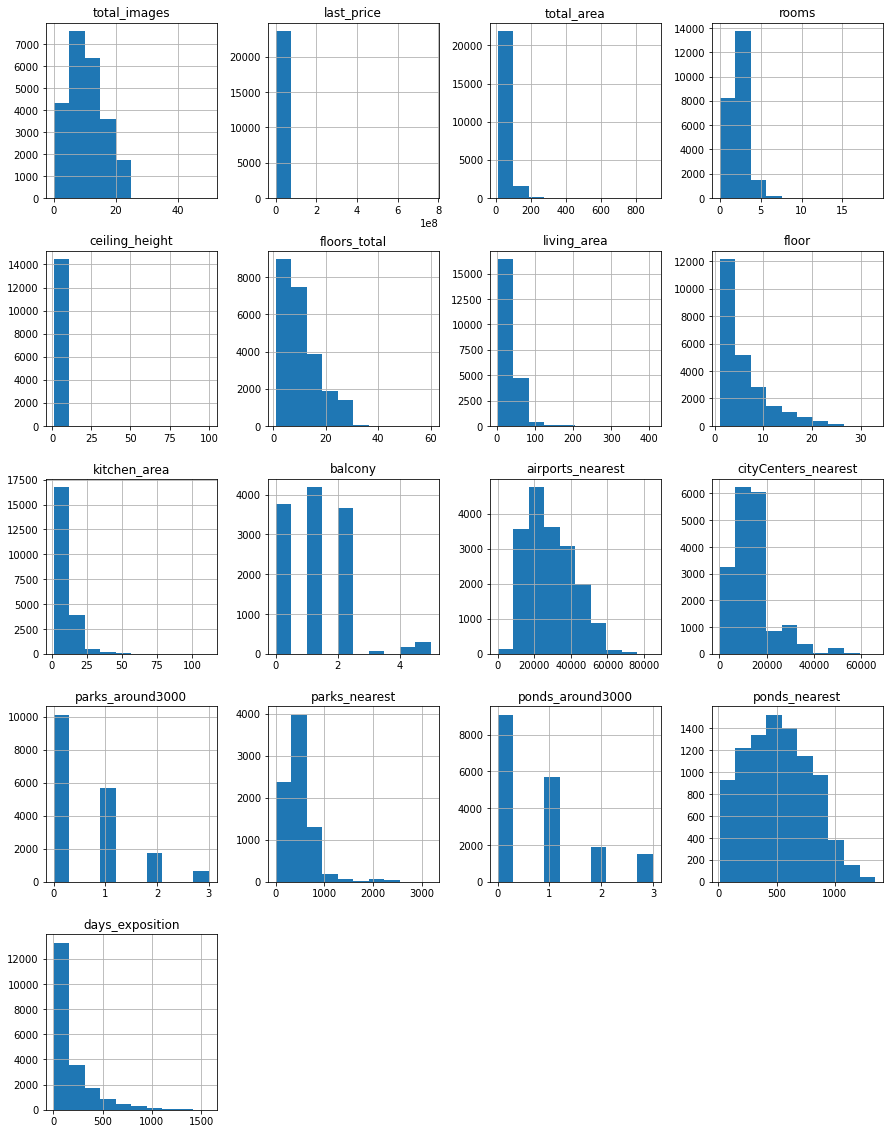

In [5]:
# построим общую гистограмму для всех числовых столбцов
import matplotlib.pyplot as plt
data.hist(figsize=(15,20))
plt.show()

Большинство квартир фоторгафировали меньше 20 раз, в основном квартиры стоят меньше $10^8$, большинство квартир площадью меньше 100 кв.м. и количеством комнат меньше 5. Высота потолков в основном меньше 10 метров. Общее количество этажей в большинстве домов меньше 20. Большинство квартир находится между 1 и 10 этажами. Площадь кухни в основном меньше 25 кв.м. Количество балконов в большинтсе квартир оказывается меньше 3, ближайший аэропорт как в большинтсве случаев находится не более, чем в 60 км, а центр города - не более, чем в 20 км. Парков в радиусе 3 км от 1 до 5, в то время как большинство ближайших парков находится в радиусе 1 км. Число прудов в радиусе 3 км составляет от 0 до 3, а ближайший, как правило, находится в 1 км от квартиры. Объявления о квартирах в основном находятся на сайте не более 1 дня.

### Предобработка данных

In [6]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


Пропущенные значения есть в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition.

Значения Nan в столбцах balcony, parks_around3000 и ponds_around3000 связаны с тем, что продавец не указал число балконов, парков и прудов, и, скорее всего, это значит, что можно их просто заменить на 0. Также следует изменить тип данных с float на int, потому что количество балконов, количество комнат, парков и прудов - это целое число. 

In [7]:
# количество уникальных значений в столбце balcony
print(data['balcony'].unique())
# заменим Nan на 0
data['balcony'] = data['balcony'].fillna(0)
# изменим тип данных с float на int
data['balcony'] = data['balcony'].astype(int)
print(data['balcony'].unique())

[nan  2.  0.  1.  5.  4.  3.]
[0 2 1 5 4 3]


In [8]:
# количество уникальных значений в столбце parks_around3000
print(data['parks_around3000'].unique())
# заменим Nan на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)
# изменим тип данных с float на int
data['parks_around3000'] = data['parks_around3000'].astype(int)

[ 1.  0.  2. nan  3.]


In [9]:
# количество уникальных значений в столбце pounds_around3000
print(data['ponds_around3000'].unique())
# заменим Nan на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
# изменим тип данных с float на int
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

[ 2.  0.  3.  1. nan]


In [10]:
# изменим тип данных с float на int
data['rooms'] = data['rooms'].astype(int)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Разберёмся с пропусками в столбце ceiling_height. Посмотрим на уникальные значения в этом столбце, некоторые значения больше 11 метров. Вероятно, здесь есть ошибка в данных, связанная с положением запятой, и нужно разделить эти значения на 10. А пропущенные значения заменить на медиану.

In [12]:
# посмотрим на уникальные значения
print(sorted(data['ceiling_height'].unique()))

[1.0, 2.0, 2.3, 2.4, 2.45, 2.46, 2.48, 2.53, 2.59, 2.62, 2.63, 2.7, nan, 1.2, 1.75, 2.2, 2.25, 2.34, 2.47, 2.49, 2.5, 2.51, 2.52, 2.54, 2.55, 2.56, 2.57, 2.58, 2.6, 2.61, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.8, 6.0, 8.0, 8.3, 1

In [13]:
# передадим уникальные значения в массив
height = data['ceiling_height'].unique()
# отфильтруем значения больше 11
max_height = sorted(height[(height > 11)])
# уменьшим значения, которые больше 11, в 10 раз
for height_value in data['ceiling_height']:
    if height_value in max_height:
        data.loc[data['ceiling_height'] == height_value] = height_value / 10
print(sorted(data['ceiling_height'].unique()))

[1.0, 1.2, 1.4, 1.75, 2.0, 2.2, 2.25, 2.2600000000000002, 2.7, nan, 2.3, 2.34, 2.4, 2.45, 2.46, 2.47, 2.48, 2.49, 2.5, 2.51, 2.52, 2.53, 2.54, 2.55, 2.56, 2.57, 2.58, 2.59, 2.6, 2.61, 2.62, 2.63, 2.64, 2.65, 2.66, 2.67, 2.68, 2.69, 2.71, 2.72, 2.73, 2.74, 2.75, 2.76, 2.77, 2.78, 2.79, 2.8, 2.81, 2.82, 2.83, 2.84, 2.85, 2.86, 2.87, 2.88, 2.89, 2.9, 2.91, 2.92, 2.93, 2.94, 2.95, 2.96, 2.97, 2.98, 2.99, 3.0, 3.01, 3.02, 3.03, 3.04, 3.05, 3.06, 3.07, 3.08, 3.09, 3.1, 3.11, 3.12, 3.13, 3.14, 3.15, 3.16, 3.17, 3.18, 3.2, 3.21, 3.22, 3.23, 3.24, 3.25, 3.26, 3.27, 3.28, 3.29, 3.3, 3.31, 3.32, 3.33, 3.34, 3.35, 3.36, 3.37, 3.38, 3.39, 3.4, 3.42, 3.43, 3.44, 3.45, 3.46, 3.47, 3.48, 3.49, 3.5, 3.51, 3.52, 3.53, 3.54, 3.55, 3.56, 3.57, 3.58, 3.59, 3.6, 3.62, 3.63, 3.65, 3.66, 3.67, 3.68, 3.69, 3.7, 3.75, 3.76, 3.78, 3.8, 3.82, 3.83, 3.84, 3.85, 3.86, 3.87, 3.88, 3.9, 3.93, 3.95, 3.98, 4.0, 4.06, 4.1, 4.14, 4.15, 4.19, 4.2, 4.25, 4.3, 4.37, 4.4, 4.45, 4.5, 4.65, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5

In [14]:
# теперь заменим Nan на медианное значние
data['ceiling_height'] = (
    data['ceiling_height']
    .fillna(data['ceiling_height']
    .median())
)

In [15]:
# проверим, заменились ли значения Nan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  float64
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  float64
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  float64
 9   is_apartment          2787 non-null   object 
 10  studio                23699 non-null  object 
 11  open_plan             23699 non-null  object 
 12  kitchen_area          21425 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [16]:
# количество этажей в здании должно быть целым
data['floors_total'].value_counts()

5.00     5778
9.00     3759
16.00    1376
12.00    1362
4.00     1199
10.00    1174
25.00    1074
6.00      913
17.00     832
3.00      667
7.00      592
14.00     551
18.00     505
24.00     468
8.00      390
2.00      382
15.00     365
23.00     352
19.00     339
22.00     286
20.00     271
13.00     229
11.00     203
27.00     164
21.00     158
26.00     124
1.00       25
35.00      24
28.00      21
2.70        8
2.50        7
3.20        2
36.00       2
37.00       1
29.00       1
52.00       1
2.40        1
2.26        1
34.00       1
60.00       1
33.00       1
2.75        1
1.40        1
2.60        1
Name: floors_total, dtype: int64

Значения 2.26 и 2.75 встречаются в данных 1 раз, поэтому мы можем их выбросить.
Остальные нецелые значения, скорее всего, были получены из-за ошибки с десятичной запятой, поэтому нужно их умножить на 10.

In [17]:
non_int_floors = [2.7, 2.5, 3.2, 2.4, 1.4, 2.6]
for floor in data['floors_total']:
    if floor in non_int_floors:
        data.loc[data['floors_total'] == floor] = floor * 10

In [18]:
# проверяем, изменились ли значения
data['floors_total'].unique()

array([16.  , 11.  ,  5.  , 14.  , 12.  , 26.  , 24.  , 27.  ,  9.  ,
        6.  , 17.  , 25.  ,  3.  , 23.  , 19.  , 18.  ,  4.  , 22.  ,
        8.  ,  2.  , 10.  ,  7.  , 13.  , 15.  ,   nan, 20.  , 28.  ,
       36.  , 21.  , 35.  , 34.  , 60.  ,  1.  , 32.  , 29.  , 33.  ,
       52.  , 37.  ,  2.26,  2.75])

In [19]:
# удаляем значения 2.26 и 2.75
new_data = data.query('floors_total not in [2.26, 2.75]').reset_index(drop=True)
# print(new_data.info()) 
new_data['floors_total'] = (
    new_data['floors_total']
    .fillna(new_data['floors_total']
    .median())
)
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23698 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23698 non-null  float64
 1   last_price            23698 non-null  float64
 2   total_area            23698 non-null  float64
 3   first_day_exposition  23698 non-null  object 
 4   rooms                 23698 non-null  float64
 5   ceiling_height        23698 non-null  float64
 6   floors_total          23698 non-null  float64
 7   living_area           21795 non-null  float64
 8   floor                 23698 non-null  float64
 9   is_apartment          2786 non-null   object 
 10  studio                23698 non-null  object 
 11  open_plan             23698 non-null  object 
 12  kitchen_area          21424 non-null  float64
 13  balcony               23698 non-null  float64
 14  locality_name         23649 non-null  object 
 15  airports_nearest   

Рассмотрим данные в столбце "living_area". В этом столбце есть пропуски nan, мы можем заменить эти значения на медианное, чтобы не портить статистику.

In [20]:
#print(new_data['living_area'].value_counts())
#print(sorted(new_data['living_area'].unique()))
new_data['living_area'] = (
    new_data['living_area']
    .fillna(new_data['living_area']
    .median())
)

In [21]:
# проверяем, изменились ли значения
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23698 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23698 non-null  float64
 1   last_price            23698 non-null  float64
 2   total_area            23698 non-null  float64
 3   first_day_exposition  23698 non-null  object 
 4   rooms                 23698 non-null  float64
 5   ceiling_height        23698 non-null  float64
 6   floors_total          23698 non-null  float64
 7   living_area           23698 non-null  float64
 8   floor                 23698 non-null  float64
 9   is_apartment          2786 non-null   object 
 10  studio                23698 non-null  object 
 11  open_plan             23698 non-null  object 
 12  kitchen_area          21424 non-null  float64
 13  balcony               23698 non-null  float64
 14  locality_name         23649 non-null  object 
 15  airports_nearest   

# Столбец is_apartment, studio и open_plan

Рассмотрим данные в столбцах is_apartment, studio и open_plan. Данные в этих столбцах должны принадлежать будеву типу, то есть нужно поменять тип данных и изменить значения NaN на False, а остальные числовые значения на True.

Пропуски в данных в столбце 'is_apartment', вероятно, связаны с тем, что жилая площадь является комнатой, а не квартирой.

In [22]:
new_data[new_data['is_apartment'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20.0,13000000.0,108.00,2019-03-07T00:00:00,3.0,2.70,16.0,51.0,8.0,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7.0,3350000.0,40.40,2018-12-04T00:00:00,1.0,2.65,11.0,18.6,1.0,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10.0,5196000.0,56.00,2015-08-20T00:00:00,2.0,2.65,5.0,34.3,4.0,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0.0,64900000.0,159.00,2015-07-24T00:00:00,3.0,2.65,14.0,30.0,9.0,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2.0,10000000.0,100.00,2018-06-19T00:00:00,2.0,3.03,14.0,32.0,13.0,NaN,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9.0,9700000.0,133.81,2017-03-21T00:00:00,3.0,3.70,5.0,73.3,3.0,NaN,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23694,14.0,3100000.0,59.00,2018-01-15T00:00:00,3.0,2.65,5.0,38.0,4.0,NaN,...,8.50,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23695,18.0,2500000.0,56.70,2018-02-11T00:00:00,2.0,2.65,3.0,29.7,1.0,NaN,...,NaN,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN
23696,13.0,11475000.0,76.75,2017-03-28T00:00:00,2.0,3.00,17.0,30.0,12.0,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


Посмотрим на уникальные значения в стобцах is_apartment, studio и open_plan.

In [23]:
print(sorted(new_data['is_apartment'].unique()))
print(sorted(new_data['studio'].unique()))
print(sorted(new_data['open_plan'].unique()))

print(new_data['is_apartment'].value_counts())
print(new_data['is_apartment'].isnull().sum())
print(new_data['studio'].value_counts())
print(new_data['open_plan'].value_counts())

[nan, False, True, 2.0, 2.2600000000000002, 10.0, 14.0, 24.0, 25.0, 26.0, 27.0, 32.0]
[False, True, 2.0, 2.2600000000000002, 10.0, 14.0, 24.0, 25.0, 26.0, 27.0, 32.0]
[False, True, 2.0, 2.2600000000000002, 10.0, 14.0, 24.0, 25.0, 26.0, 27.0, 32.0]
False                 2716
True                    47
27.0                     8
25.0                     7
32.0                     2
2.0                      1
10.0                     1
14.0                     1
24.0                     1
26.0                     1
2.2600000000000002       1
Name: is_apartment, dtype: int64
20912
False                 23526
True                    149
27.0                      8
25.0                      7
32.0                      2
2.0                       1
10.0                      1
14.0                      1
24.0                      1
26.0                      1
2.2600000000000002        1
Name: studio, dtype: int64
False                 23609
True                     66
27.0                     

Рассмотрим на количество комнат, оно больше или равно 1, следовательно, пропуски в этом столбце мы должны 
заменить на значение True.

In [24]:
new_data[new_data['is_apartment'].isnull()]
new_data['is_apartment'] = new_data['is_apartment'].fillna(True)

Видно, что значения [27.0, 25.0, 32.0, 2.0, 10.0, 14.0, 24.0, 26.0] являются выбросом, поэтому от этих строчек нужно избавиться.

In [25]:
error_apart = [27.0, 25.0, 32.0, 2.0, 10.0, 14.0, 24.0, 26.0]
ind_apart = new_data.query("is_apartment in @error_apart").index.tolist()
new_data = new_data.drop(ind_apart)

In [26]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23676 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23676 non-null  float64
 1   last_price            23676 non-null  float64
 2   total_area            23676 non-null  float64
 3   first_day_exposition  23676 non-null  object 
 4   rooms                 23676 non-null  float64
 5   ceiling_height        23676 non-null  float64
 6   floors_total          23676 non-null  float64
 7   living_area           23676 non-null  float64
 8   floor                 23676 non-null  float64
 9   is_apartment          23676 non-null  object 
 10  studio                23676 non-null  object 
 11  open_plan             23676 non-null  object 
 12  kitchen_area          21402 non-null  float64
 13  balcony               23676 non-null  float64
 14  locality_name         23627 non-null  object 
 15  airports_nearest   

In [27]:
print(sorted(new_data['is_apartment'].unique()))
print(sorted(new_data['studio'].unique()))
print(sorted(new_data['open_plan'].unique()))

print(new_data['is_apartment'].value_counts())
print(new_data['studio'].value_counts())
print(new_data['open_plan'].value_counts())

[False, True, 2.2600000000000002]
[False, True, 2.2600000000000002]
[False, True, 2.2600000000000002]
True                  20959
False                  2716
2.2600000000000002        1
Name: is_apartment, dtype: int64
False                 23526
True                    149
2.2600000000000002        1
Name: studio, dtype: int64
False                 23609
True                     66
2.2600000000000002        1
Name: open_plan, dtype: int64


# Столбец kitchen_area

Пропуски в столбце kitchen_area лучше заполнить медианными значениями по столбцу с living_area
большинство пропущенных значений в столбце kitchen_area соответствует значениям 30 в столбце living area,
поэтому нужно заменить Nan на медианные в соответсвие с значениями в living area.

In [28]:
#print(sorted(new_data['kitchen_area'].unique()))
new_data[new_data['kitchen_area'].isnull()]
print(new_data['kitchen_area'].isnull().sum())
df_ka_30 = new_data.query('living_area == 30.0 and not kitchen_area.isnull()')
# найдём медиану с living_area = 30
ka_median_30 = df_ka_30['kitchen_area'].median()
print(ka_median_30)
# заменим пропущенные значения в столбце kitchen_area на медианное по столбцу с living_area = 30
new_data.loc[new_data['living_area']==30.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']==30.0, 'kitchen_area']
    .fillna(ka_median_30)
)

2274
9.0


Далее имеет смысл заменять медианными значениями по диапазнам в столбце living_area, а не по отдельным значениям. До 12, от 12 до 15, от 15 до 20, от 20 до 25, от 25 до 30, от 30 до 35, от 35 до 40, от 40 до 45, от 45 до 50, от 50 до 55, от 55 до 60, от 60 до 70, от 70 до 80, от 80 до 90, от 100 до 130, от 130 до 150, от 150 до 180, от 180 до 200 и более 200.

In [29]:
# найдём медиану с living_area <= 12
df_ka_12 = new_data.query('living_area <= 12.0 and not kitchen_area.isnull()')
ka_median_12 = df_ka_12['kitchen_area'].median()
print(ka_median_12)
new_data.loc[new_data['living_area']<=12.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']<=12.0, 'kitchen_area']
    .fillna(ka_median_12)
)

15.0


In [30]:
# найдём медиану с 12 < living_area < 15
df_ka_15 = new_data.query('12.0 < living_area <= 15.0 and not kitchen_area.isnull()')
ka_median_15 = df_ka_15['kitchen_area'].median()
print(ka_median_15)
new_data.loc[new_data['living_area']<=15.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']<=15.0, 'kitchen_area']
    .fillna(ka_median_15)
)

9.5


In [31]:
# найдём медиану с 15 < living_area < 20
df_ka_20 = new_data.query('15.0 < living_area <= 20.0 and not kitchen_area.isnull()')
ka_median_20 = df_ka_20['kitchen_area'].median()
print(ka_median_20)
new_data.loc[new_data['living_area']<=20.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']<=20.0, 'kitchen_area']
    .fillna(ka_median_20)
)

9.0


In [32]:
# найдём медиану с 20 < living_area < 25
df_ka_25 = new_data.query('20.0 < living_area <= 25.0 and not kitchen_area.isnull()')
ka_median_25 = df_ka_25['kitchen_area'].median()
print(ka_median_25)
new_data.loc[new_data['living_area']<=25.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']<=25.0, 'kitchen_area']
    .fillna(ka_median_25)
)

10.0


In [33]:
# найдём медиану с 25 < living_area < 30
df_ka_30 = new_data.query('25.0 < living_area <= 30.0 and not kitchen_area.isnull()')
ka_median_30 = df_ka_30['kitchen_area'].median()
print(ka_median_30)
new_data.loc[new_data['living_area']<=30.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']<=30.0, 'kitchen_area']
    .fillna(ka_median_30)
)

9.0


In [34]:
# найдём медиану с 30 < living_area < 35
df_ka_35 = new_data.query('30.0 < living_area <= 35.0 and not kitchen_area.isnull()')
ka_median_35 = df_ka_35['kitchen_area'].median()
print(ka_median_35)
new_data.loc[new_data['living_area']<=35.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']<=35.0, 'kitchen_area']
    .fillna(ka_median_35)
)

9.0


In [35]:
# найдём медиану с 35 < living_area < 40
df_ka_40 = new_data.query('35.0 < living_area <= 40.0 and not kitchen_area.isnull()')
ka_median_40 = df_ka_40['kitchen_area'].median()
print(ka_median_40)
new_data.loc[new_data['living_area']<=40.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']<=40.0, 'kitchen_area']
    .fillna(ka_median_40)
)

9.1


In [36]:
# найдём медиану с 40 < living_area < 45
df_ka_45 = new_data.query('40.0 < living_area <= 45.0 and not kitchen_area.isnull()')
ka_median_45 = df_ka_45['kitchen_area'].median()
print(ka_median_45)
new_data.loc[new_data['living_area']<=45.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']<=45.0, 'kitchen_area']
    .fillna(ka_median_45)
)

8.5


In [37]:
# найдём медиану с 45 < living_area < 50
df_ka_50 = new_data.query('45.0 < living_area <= 50.0 and not kitchen_area.isnull()')
ka_median_50 = df_ka_50['kitchen_area'].median()
print(ka_median_50)
new_data.loc[new_data['living_area']<=50.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']<=50.0, 'kitchen_area']
    .fillna(ka_median_50)
)

10.56


In [38]:
# найдём медиану с 50 < living_area < 55
df_ka_55 = new_data.query('50.0 < living_area <= 55.0 and not kitchen_area.isnull()')
ka_median_55 = df_ka_55['kitchen_area'].median()
print(ka_median_55)
new_data.loc[new_data['living_area']<=55.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']<=55.0, 'kitchen_area']
    .fillna(ka_median_55)
)

12.0


In [39]:
# найдём медиану с 55 < living_area < 60
df_ka_60 = new_data.query('55.0 < living_area <= 60.0 and not kitchen_area.isnull()')
ka_median_60 = df_ka_60['kitchen_area'].median()
print(ka_median_60)
new_data.loc[new_data['living_area']<=60.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']<=60.0, 'kitchen_area']
    .fillna(ka_median_60)
)

12.2


In [40]:
# найдём медиану с 55 < living_area < 60
df_ka_60 = new_data.query('55.0 < living_area <= 60.0 and not kitchen_area.isnull()')
ka_median_60 = df_ka_60['kitchen_area'].median()
print(ka_median_60)
new_data.loc[new_data['living_area']<=60.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']<=60.0, 'kitchen_area']
    .fillna(ka_median_60)
)

12.2


In [41]:
# найдём медиану с 60 < living_area < 70
df_ka_70 = new_data.query('60.0 < living_area <= 70.0 and not kitchen_area.isnull()')
ka_median_70 = df_ka_70['kitchen_area'].median()
print(ka_median_70)
new_data.loc[new_data['living_area']<=70.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']<=70.0, 'kitchen_area']
    .fillna(ka_median_70)
)

13.5


In [42]:
# найдём медиану с 70 < living_area < 80
df_ka_80 = new_data.query('70.0 < living_area <= 80.0 and not kitchen_area.isnull()')
ka_median_80 = df_ka_80['kitchen_area'].median()
print(ka_median_80)
new_data.loc[new_data['living_area']<=80.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']<=80.0, 'kitchen_area']
    .fillna(ka_median_80)
)

13.95


In [43]:
# найдём медиану с 80 < living_area < 90
df_ka_90 = new_data.query('80.0 < living_area <= 90.0 and not kitchen_area.isnull()')
ka_median_90 = df_ka_90['kitchen_area'].median()
print(ka_median_90)
new_data.loc[new_data['living_area']<=90.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']<=90.0, 'kitchen_area']
    .fillna(ka_median_90)
)

15.0


In [44]:
# найдём медиану с 100 < living_area < 130
df_ka_130 = new_data.query('100.0 < living_area <= 130.0 and not kitchen_area.isnull()')
ka_median_130 = df_ka_130['kitchen_area'].median()
print(ka_median_130)
new_data.loc[new_data['living_area']<=130.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']<=130.0, 'kitchen_area']
    .fillna(ka_median_130)
)

17.0


In [45]:
# найдём медиану с 130 < living_area < 150
df_ka_150 = new_data.query('130.0 < living_area <= 150.0 and not kitchen_area.isnull()')
ka_median_150 = df_ka_150['kitchen_area'].median()
print(ka_median_150)
new_data.loc[new_data['living_area']<=150.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']<=150.0, 'kitchen_area']
    .fillna(ka_median_150)
)

20.0


In [46]:
# найдём медиану с 150 < living_area < 180
df_ka_180 = new_data.query('150.0 < living_area <= 180.0 and not kitchen_area.isnull()')
ka_median_180 = df_ka_180['kitchen_area'].median()
print(ka_median_180)
new_data.loc[new_data['living_area']<=180.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']<=180.0, 'kitchen_area']
    .fillna(ka_median_180)
)

25.0


In [47]:
# найдём медиану с 180 < living_area < 200
df_ka_200 = new_data.query('180.0 < living_area and not kitchen_area.isnull()')
ka_median_200 = df_ka_200['kitchen_area'].median()
print(ka_median_200)
new_data.loc[new_data['living_area']<=200.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']<=200.0, 'kitchen_area']
    .fillna(ka_median_200)
)

30.9


In [48]:
# найдём медиану с 200 < living_area 
df_ka_220 = new_data.query('200.0 < living_area and not kitchen_area.isnull()')
ka_median_220 = df_ka_220['kitchen_area'].median()
print(ka_median_220)
new_data.loc[new_data['living_area']>=200.0, 'kitchen_area'] = (
    new_data.loc[new_data['living_area']>=200.0, 'kitchen_area']
    .fillna(ka_median_220)
)

40.0


In [49]:
new_data[new_data['kitchen_area'].isnull()]
#print(new_data[new_data['kitchen_area'].isnull()]['living_area'].median())
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23676 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23676 non-null  float64
 1   last_price            23676 non-null  float64
 2   total_area            23676 non-null  float64
 3   first_day_exposition  23676 non-null  object 
 4   rooms                 23676 non-null  float64
 5   ceiling_height        23676 non-null  float64
 6   floors_total          23676 non-null  float64
 7   living_area           23676 non-null  float64
 8   floor                 23676 non-null  float64
 9   is_apartment          23676 non-null  object 
 10  studio                23676 non-null  object 
 11  open_plan             23676 non-null  object 
 12  kitchen_area          23676 non-null  float64
 13  balcony               23676 non-null  float64
 14  locality_name         23627 non-null  object 
 15  airports_nearest   

# Столбец locality_name

Видно, что присутствуют неявные дубликаты в названиях населённых пуктов источниками дубликатов являются буквы е и ё, а также просто название населённых пуктов без обозначения типов этих поселений проверим, что в таблице нет дубликатов.

In [50]:
new_data[new_data.duplicated()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [51]:
# заменим тип данных float на str
new_data['locality_name'] = new_data['locality_name'].astype(str)

In [52]:
# заменим ё на е
for loc_name in new_data['locality_name']:
    if 'посёлок' in loc_name:
        new_data.loc[new_data['locality_name'] == loc_name] = loc_name.replace('посёлок', 'поселок')
    if 'городской поселок' in loc_name:
        new_data.loc[new_data['locality_name'] == loc_name] = loc_name.replace('городской поселок', 'поселок городского типа')
    if 'железнодорожной' in loc_name:
        new_data.loc[new_data['locality_name'] == loc_name] = loc_name.replace('поселок при железнодорожной станции', 'поселок станции')
    if 'коттеджный' in loc_name:
        new_data.loc[new_data['locality_name'] == loc_name] = loc_name.replace('коттеджный поселок', 'поселок')        

Заменим Мурино на поселок Мурино, Кудрово на деревню Кудрово и т.д. Любань - это город, поэтому тоже нужно исправить, Щеглово деревня и посёлок - это разные географические объекты, поэтому их не заменяем.

In [53]:
for loc_name in new_data['locality_name']:
    if 'Мурино' in loc_name:
        new_data.loc[new_data['locality_name'] == loc_name] = 'поселок Мурино'
    if 'Кудрово' in loc_name:
        new_data.loc[new_data['locality_name'] == loc_name] = 'деревня Кудрово'
    if 'Громово' in loc_name:
        new_data.loc[new_data['locality_name'] == loc_name] = 'поселок станции Громово'
    if 'Приветнинское' in loc_name:
        new_data.loc[new_data['locality_name'] == loc_name] = 'поселок станции Приветнинское'     
    if 'Никольское' in loc_name:
        new_data.loc[new_data['locality_name'] == loc_name] = 'село Никольское'   
    if 'Приладожский' in loc_name:
        new_data.loc[new_data['locality_name'] == loc_name] = 'поселок городского типа Приладожский'
    if 'Рахья' in loc_name:
        new_data.loc[new_data['locality_name'] == loc_name] = 'поселок городского типа Рахья'    
    if 'Калитино' in loc_name:
        new_data.loc[new_data['locality_name'] == loc_name] = 'поселок Калитино'    
    if 'Любань' in loc_name:
        new_data.loc[new_data['locality_name'] == loc_name] = 'Любань' 

In [54]:
new_data[new_data['locality_name'] == 'nan']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3.0,8600000.0,81.7,2016-04-15T00:00:00,3.0,3.55,5.0,50.8,2.0,True,...,8.8,0.0,nan,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6.0,5398000.0,80.0,2017-05-30T00:00:00,3.0,2.65,4.0,42.6,2.0,True,...,18.6,0.0,nan,NaN,NaN,0.0,NaN,0.0,NaN,34.0
2603,20.0,3351765.0,42.7,2015-09-20T00:00:00,1.0,2.65,24.0,15.6,3.0,True,...,10.7,0.0,nan,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2.0,5130593.0,62.4,2015-10-11T00:00:00,2.0,2.65,24.0,33.1,21.0,True,...,8.2,0.0,nan,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10.0,4200000.0,46.5,2016-05-28T00:00:00,2.0,2.65,5.0,30.8,5.0,True,...,6.5,0.0,nan,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17.0,17600000.0,89.5,2014-12-09T00:00:00,2.0,3.0,8.0,39.62,7.0,True,...,13.38,0.0,nan,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7.0,9200000.0,80.0,2015-12-10T00:00:00,3.0,4.0,4.0,52.3,3.0,False,...,10.4,0.0,nan,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1.0,5500000.0,83.0,2015-08-14T00:00:00,3.0,2.65,7.0,30.0,6.0,True,...,9.0,0.0,nan,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19.0,13540000.0,85.5,2016-01-20T00:00:00,3.0,2.65,7.0,59.1,5.0,False,...,8.3,4.0,nan,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7.0,3700000.0,30.0,2016-04-29T00:00:00,1.0,2.65,24.0,20.0,23.0,True,...,9.0,0.0,nan,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


Проверим значения на близость к центру, если значения будут совпадать по столбцу cityCenters_nearest, и значения по столбцу airports_nearest будут совпадать или близки, то будем ставить населённый пункт такой же
как и в столбце locality_name для данных строк.

In [55]:
new_data.query('cityCenters_nearest == 4258.0') # нужно locality_name заменить на Санкт-Петербург
new_data.loc[new_data['cityCenters_nearest'] == 4258.0, 'locality_name'] = 'Санкт-Петербург'

In [56]:
new_data.query('cityCenters_nearest == 17369.0') # нужно locality_name заменить на Санкт-Петербург
new_data.loc[new_data['cityCenters_nearest'] == 17369.0, 'locality_name'] = 'Санкт-Петербург'

In [57]:
new_data.query('cityCenters_nearest == 8127.0') # нужно locality_name заменить на Санкт-Петербург
new_data.loc[new_data['cityCenters_nearest'] == 8127.0, 'locality_name'] = 'Санкт-Петербург'

In [58]:
new_data.query('cityCenters_nearest == 3902.0') # нужно locality_name заменить на Санкт-Петербург
new_data.loc[new_data['cityCenters_nearest'] == 3902.0, 'locality_name'] = 'Санкт-Петербург'

In [59]:
new_data.query('cityCenters_nearest == 16788.0') # нужно locality_name заменить на Санкт-Петербург
new_data.loc[new_data['cityCenters_nearest'] == 16788.0, 'locality_name'] = 'Санкт-Петербург'

In [60]:
new_data.query('cityCenters_nearest == 8582.0') # нужно locality_name заменить на Санкт-Петербург
new_data.loc[new_data['cityCenters_nearest'] == 8582.0, 'locality_name'] = 'Санкт-Петербург'

In [61]:
new_data.query('cityCenters_nearest == 12332.0') # нужно locality_name заменить на Санкт-Петербург
new_data.loc[new_data['cityCenters_nearest'] == 12332.0, 'locality_name'] = 'Санкт-Петербург'

In [62]:
new_data.query('cityCenters_nearest == 3801.0') # нужно locality_name заменить на Санкт-Петербург
new_data.loc[new_data['cityCenters_nearest'] == 3801.0, 'locality_name'] = 'Санкт-Петербург'

In [63]:
new_data.query('cityCenters_nearest == 4474.0') # нужно locality_name заменить на Санкт-Петербург
new_data.loc[new_data['cityCenters_nearest'] == 4474.0, 'locality_name'] = 'Санкт-Петербург'

In [64]:
new_data.query('cityCenters_nearest == 4069.0') # нужно locality_name заменить на Санкт-Петербург
new_data.loc[new_data['cityCenters_nearest'] == 4069.0, 'locality_name'] = 'Санкт-Петербург'

In [65]:
new_data.query('cityCenters_nearest == 8619.0') # нужно locality_name заменить на Санкт-Петербург
new_data.loc[new_data['cityCenters_nearest'] == 8619.0, 'locality_name'] = 'Санкт-Петербург'

In [66]:
new_data.query('cityCenters_nearest == 1322.0') # нужно locality_name заменить на Санкт-Петербург
new_data.loc[new_data['cityCenters_nearest'] == 1322.0, 'locality_name'] = 'Санкт-Петербург'

In [67]:
new_data.query('cityCenters_nearest == 10976.0') # нужно locality_name заменить на Санкт-Петербург
new_data.loc[new_data['cityCenters_nearest'] == 10976.0, 'locality_name'] = 'Санкт-Петербург'

In [68]:
new_data.query('cityCenters_nearest == 4805.0') # нужно locality_name заменить на Санкт-Петербург
new_data.loc[new_data['cityCenters_nearest'] == 4805.0, 'locality_name'] = 'Санкт-Петербург'

In [69]:
new_data.query('cityCenters_nearest == 1780.0') # нужно locality_name заменить на Санкт-Петербург
new_data.loc[new_data['cityCenters_nearest'] == 1780.0, 'locality_name'] = 'Санкт-Петербург'

In [70]:
new_data[new_data['locality_name'] == 'nan']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2033,6.0,5398000.0,80.0,2017-05-30T00:00:00,3.0,2.65,4.0,42.6,2.0,True,...,18.6,0.0,nan,NaN,NaN,0.0,NaN,0.0,NaN,34.0
4189,7.0,9200000.0,80.0,2015-12-10T00:00:00,3.0,4.0,4.0,52.3,3.0,False,...,10.4,0.0,nan,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1.0,5500000.0,83.0,2015-08-14T00:00:00,3.0,2.65,7.0,30.0,6.0,True,...,9.0,0.0,nan,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19.0,13540000.0,85.5,2016-01-20T00:00:00,3.0,2.65,7.0,59.1,5.0,False,...,8.3,4.0,nan,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
7330,8.0,5100000.0,63.0,2015-01-27T00:00:00,3.0,2.65,5.0,42.0,1.0,False,...,7.5,0.0,nan,25925.0,4627.0,2.0,459.0,0.0,NaN,566.0
8568,10.0,16000000.0,155.0,2016-05-09T00:00:00,3.0,2.65,6.0,94.0,3.0,True,...,23.0,0.0,nan,24233.0,4065.0,1.0,547.0,0.0,NaN,248.0
8986,10.0,4850000.0,103.1,2018-07-10T00:00:00,3.0,2.65,9.0,68.1,4.0,True,...,16.7,0.0,nan,19659.0,31813.0,0.0,NaN,0.0,NaN,28.0
12936,6.0,6800000.0,73.0,2015-11-01T00:00:00,3.0,2.65,5.0,53.1,2.0,True,...,8.2,0.0,nan,25680.0,4383.0,3.0,336.0,0.0,NaN,542.0
13690,7.0,3500000.0,71.0,2016-06-23T00:00:00,3.0,2.75,2.0,45.6,1.0,False,...,8.0,2.0,nan,20234.0,23659.0,0.0,NaN,2.0,296.0,92.0
14342,3.0,3611000.0,53.5,2017-04-27T00:00:00,1.0,2.65,4.0,25.8,3.0,False,...,9.0,1.0,nan,NaN,NaN,0.0,NaN,0.0,NaN,92.0


Теперь проверим аналогичным образом по столбцу airports_nearest.

In [71]:
new_data.query('airports_nearest == 25680.0') # нужно locality_name заменить на Санкт-Петербург
new_data.loc[new_data['airports_nearest'] == 25680.0, 'locality_name'] = 'Санкт-Петербург'

Остальные значения нельзя заполнить из сравнения значений столбца airports_nearest, потому что они встречаются 1 - 2, либо значение в стобце cityCenters_nearest сильно отличается от прочих равных, поэтому оставшиеся значения мы заполним медианным.

In [72]:
new_data[new_data['locality_name'] == 'nan']
print(new_data['locality_name'].value_counts().head(30))

Санкт-Петербург                    15732
поселок Мурино                       588
деревня Кудрово                      472
поселок Шушары                       440
Всеволожск                           398
Пушкин                               369
Колпино                              338
поселок Парголово                    327
Гатчина                              306
Выборг                               237
Петергоф                             201
Сестрорецк                           183
Красное Село                         178
деревня Новое Девяткино              144
Сертолово                            142
Ломоносов                            133
Кириши                               125
поселок Бугры                        114
Сланцы                               112
Волхов                               110
Кингисепп                            104
Тосно                                104
Кронштадт                             95
село Никольское                       94
Коммунар        

Остальные значения Nan непонятно на что заменять, поэтому оставим пока в таком виде.

# Столбец airports_nearest

In [73]:
new_data[new_data['airports_nearest'].isnull()]
#print(new_data['airports_nearest'].isnull().sum())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12,10.0,3890000.0,54.0,2016-06-30T00:00:00,2.0,2.65,5.0,30.0,5.0,True,...,9.0,0.0,Сертолово,NaN,NaN,0.0,NaN,0.0,NaN,90.0
30,12.0,2200000.0,32.8,2018-02-19T00:00:00,1.0,2.65,9.0,30.0,2.0,True,...,9.0,0.0,Коммунар,NaN,NaN,0.0,NaN,0.0,NaN,63.0
37,10.0,1990000.0,45.8,2017-10-28T00:00:00,2.0,2.5,5.0,30.0,1.0,True,...,9.0,0.0,поселок городского типа Красный Бор,NaN,NaN,0.0,NaN,0.0,NaN,196.0
47,17.0,3600000.0,56.1,2018-10-18T00:00:00,3.0,2.65,4.0,42.5,3.0,True,...,5.7,1.0,Гатчина,NaN,NaN,0.0,NaN,0.0,NaN,179.0
62,0.0,4800000.0,78.6,2017-09-17T00:00:00,3.0,2.8,9.0,48.8,5.0,True,...,11.9,2.0,Сертолово,NaN,NaN,0.0,NaN,0.0,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23681,11.0,2350000.0,35.6,2016-06-23T00:00:00,1.0,2.5,5.0,17.0,4.0,False,...,8.3,2.0,Выборг,NaN,NaN,0.0,NaN,0.0,NaN,40.0
23691,2.0,1350000.0,30.0,2017-07-07T00:00:00,1.0,2.65,5.0,17.5,4.0,True,...,6.0,0.0,Тихвин,NaN,NaN,0.0,NaN,0.0,NaN,413.0
23694,14.0,3100000.0,59.0,2018-01-15T00:00:00,3.0,2.65,5.0,38.0,4.0,True,...,8.5,0.0,Тосно,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23695,18.0,2500000.0,56.7,2018-02-11T00:00:00,2.0,2.65,3.0,29.7,1.0,True,...,9.0,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN


Значения в столбце airports_nearest пропущены для Выборга, поскольку ближайший аэропорт - это финнский аэропорт,
поэтому эти значения нужно будет заполнить значениями до аэропорта Пулково от центра города.
* для Выборга это примерно 151 км
* для Сертолово это 52 км
* для Гатчины это 35 км
* для Тосно это 50.3 км
* для Всеволожска это 47.1 км
* для Киришей это 154 км
* для деревни Новое Девяткино это 44.9 км
* для Кингисеппа это 121 км
* для города Сланцы это 176 км
* для Волхова это 132 км
* для Отрадного это 43.1 км
* для Кировска это 53.1 км
* для Приозерска это 174 км

In [74]:
new_data.query('locality_name == "Выборг" and airports_nearest.isnull()')
new_data.loc[new_data['locality_name'] == "Выборг", 'airports_nearest'] = 151000.0

In [75]:
new_data.query('locality_name == "Сертолово" and airports_nearest.isnull()')
new_data.loc[new_data['locality_name'] == "Сертолово", 'airports_nearest'] = 52000.0

In [76]:
new_data.query('locality_name == "Гатчина" and airports_nearest.isnull()')
new_data.loc[new_data['locality_name'] == "Гатчина", 'airports_nearest'] = 35000.0

In [77]:
new_data.query('locality_name == "Тосно" and airports_nearest.isnull()')
new_data.loc[new_data['locality_name'] == "Тосно", 'airports_nearest'] = 50300.0

In [78]:
new_data.query('locality_name == "Всеволожск" and airports_nearest.isnull()')
new_data.loc[new_data['locality_name'] == "Всеволожск", 'airports_nearest'] = 47100.0

In [79]:
new_data.query('locality_name == "Кириши" and airports_nearest.isnull()')
new_data.loc[new_data['locality_name'] == "Кириши", 'airports_nearest'] = 154000.0

In [80]:
new_data.query('locality_name == "деревня Новое Девяткино" and airports_nearest.isnull()')
new_data.loc[new_data['locality_name'] == "деревня Новое Девяткино", 'airports_nearest'] = 44900.0

In [81]:
new_data.query('locality_name == "Кингисепп" and airports_nearest.isnull()')
new_data.loc[new_data['locality_name'] == "Кингисепп", 'airports_nearest'] = 121000.0

In [82]:
new_data.query('locality_name == "Сланцы" and airports_nearest.isnull()')
new_data.loc[new_data['locality_name'] == "Сланцы", 'airports_nearest'] = 176000.0

In [83]:
new_data.query('locality_name == "Волхов" and airports_nearest.isnull()')
new_data.loc[new_data['locality_name'] == "Волхов", 'airports_nearest'] = 132000.0

In [84]:
new_data.query('locality_name == "Отрадное" and airports_nearest.isnull()')
new_data.loc[new_data['locality_name'] == "Отрадное", 'airports_nearest'] = 43100.0

In [85]:
new_data.query('locality_name == "Кировск" and airports_nearest.isnull()')
new_data.loc[new_data['locality_name'] == "Кировск", 'airports_nearest'] = 53100.0

In [86]:
new_data.query('locality_name == "Приозерск" and airports_nearest.isnull()')
new_data.loc[new_data['locality_name'] == "Приозерск", 'airports_nearest'] = 174000.0

In [87]:
new_data[new_data['airports_nearest'].isnull()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
30,12.0,2200000.0,32.8,2018-02-19T00:00:00,1.0,2.65,9.0,30.0,2.0,True,...,9.0,0.0,Коммунар,NaN,NaN,0.0,NaN,0.0,NaN,63.0
37,10.0,1990000.0,45.8,2017-10-28T00:00:00,2.0,2.5,5.0,30.0,1.0,True,...,9.0,0.0,поселок городского типа Красный Бор,NaN,NaN,0.0,NaN,0.0,NaN,196.0
68,11.0,4150000.0,74.0,2017-08-04T00:00:00,3.0,2.8,5.0,44.0,1.0,True,...,8.0,2.0,деревня Фёдоровское,NaN,NaN,0.0,NaN,0.0,NaN,234.0
81,9.0,10949000.0,68.0,2018-12-27T00:00:00,1.0,2.65,10.0,30.0,6.0,True,...,9.0,0.0,Санкт-Петербург,NaN,NaN,0.0,NaN,0.0,NaN,NaN
91,20.0,2130000.0,54.0,2015-10-28T00:00:00,2.0,2.65,3.0,28.0,1.0,True,...,8.5,0.0,поселок Молодцово,NaN,NaN,0.0,NaN,0.0,NaN,439.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23669,9.0,2450000.0,45.6,2018-02-08T00:00:00,1.0,2.8,9.0,30.0,2.0,True,...,9.0,0.0,поселок городского типа Синявино,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23678,0.0,2500000.0,35.0,2017-12-08T00:00:00,1.0,2.65,9.0,30.0,4.0,True,...,9.0,0.0,Сосновый Бор,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23691,2.0,1350000.0,30.0,2017-07-07T00:00:00,1.0,2.65,5.0,17.5,4.0,True,...,6.0,0.0,Тихвин,NaN,NaN,0.0,NaN,0.0,NaN,413.0
23695,18.0,2500000.0,56.7,2018-02-11T00:00:00,2.0,2.65,3.0,29.7,1.0,True,...,9.0,0.0,село Рождествено,NaN,NaN,0.0,NaN,0.0,NaN,NaN


# Столбец total_images

Значения в столбце airports_nearest пропущены для поселока Бугры, более того была найдена аномалия: название
этого населённого пункта было указано во всех столбцах некоторых строк, следовательно, их нужно удалить
найдём уникальные значения в столбце total_images.

In [88]:
ti_unique = new_data['total_images'].unique()
error_ti = []
for ti_value in ti_unique:
    if type(ti_value) != float:
        error_ti.append(ti_value)
#print(error_ti)
ind_ti = []
ind_ti = new_data.query("total_images in @error_ti").index.tolist()
#print(ind_ti)

In [89]:
new_data = new_data.drop(ind_ti)
#print(new_data['total_images'].unique())

В столбце total_images должны быть целые значения. Проверим, является значение 2.26 выбросом.

In [90]:
new_data[new_data['total_images'] == 2.2600000000000002]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20507,2.26,2.26,2.26,2.26,2.26,2.26,2.26,2.26,2.26,2.26,...,2.26,2.26,2.2600000000000002,2.26,2.26,2.26,2.26,2.26,2.26,2.26


Это значение, дествительно, выброс, поэтому можем удалить всю строку

In [91]:
ind_er = new_data.query("total_images == 2.2600000000000002").index.tolist()
new_data = new_data.drop(ind_er)
print(new_data.info())
print(new_data['last_price'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20860 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   total_images          20860 non-null  object
 1   last_price            20860 non-null  object
 2   total_area            20860 non-null  object
 3   first_day_exposition  20860 non-null  object
 4   rooms                 20860 non-null  object
 5   ceiling_height        20860 non-null  object
 6   floors_total          20860 non-null  object
 7   living_area           20860 non-null  object
 8   floor                 20860 non-null  object
 9   is_apartment          20860 non-null  object
 10  studio                20860 non-null  object
 11  open_plan             20860 non-null  object
 12  kitchen_area          20860 non-null  object
 13  balcony               20860 non-null  object
 14  locality_name         20860 non-null  object
 15  airports_nearest      19230 non-null

# Столбец living_area

In [92]:
print(new_data['living_area'].isnull().sum())
new_data[new_data['living_area'].isnull()]
# заполним недостающие значения медианным значением
print(new_data['living_area'].median())
new_data['living_area'] = new_data['living_area'].fillna(new_data['living_area'].median())

0
30.0


# Столбец kitchen_area

In [93]:
print(new_data['kitchen_area'].isnull().sum())
new_data[new_data['kitchen_area'].isnull()]
# заполним недостающие значения медианным значением
print(new_data['kitchen_area'].median())
new_data['kitchen_area'] = new_data['kitchen_area'].fillna(new_data['kitchen_area'].median())

0
9.0


In [94]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20860 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20860 non-null  object 
 1   last_price            20860 non-null  object 
 2   total_area            20860 non-null  object 
 3   first_day_exposition  20860 non-null  object 
 4   rooms                 20860 non-null  object 
 5   ceiling_height        20860 non-null  object 
 6   floors_total          20860 non-null  object 
 7   living_area           20860 non-null  float64
 8   floor                 20860 non-null  object 
 9   is_apartment          20860 non-null  object 
 10  studio                20860 non-null  object 
 11  open_plan             20860 non-null  object 
 12  kitchen_area          20860 non-null  float64
 13  balcony               20860 non-null  object 
 14  locality_name         20860 non-null  object 
 15  airports_nearest   

В остальных столбцах заменять отсутствующие значения на медианы не имеет смысла, поэтому оставим пропуски.

# Заменим типы данных в столбцах

In [95]:
new_data[['total_images', 'rooms', 'floors_total', 'floor', 'balcony', 'parks_around3000', 'ponds_around3000']] = new_data[['total_images', 'rooms', 'floors_total', 'floor', 'balcony', 'parks_around3000', 'ponds_around3000']].astype(int)
#print(new_data.info())

In [96]:
new_data[['last_price', 'total_area', 'ceiling_height', 'living_area', 'kitchen_area']] = new_data[['last_price', 'total_area', 'ceiling_height', 'living_area', 'kitchen_area']].astype(float)
#print(new_data.info())
#print(new_data['total_area'].unique())

In [97]:
new_data[['is_apartment', 'studio', 'open_plan']] = new_data[['is_apartment', 'studio', 'open_plan']].astype(bool)
#print(new_data.info())
#new_data['first_day_exposition']

In [98]:
new_data['first_day_exposition'] = pd.to_datetime(new_data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(new_data.info())
new_data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20860 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20860 non-null  int64         
 1   last_price            20860 non-null  float64       
 2   total_area            20860 non-null  float64       
 3   first_day_exposition  20860 non-null  datetime64[ns]
 4   rooms                 20860 non-null  int64         
 5   ceiling_height        20860 non-null  float64       
 6   floors_total          20860 non-null  int64         
 7   living_area           20860 non-null  float64       
 8   floor                 20860 non-null  int64         
 9   is_apartment          20860 non-null  bool          
 10  studio                20860 non-null  bool          
 11  open_plan             20860 non-null  bool          
 12  kitchen_area          20860 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,True,...,9.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,30.0,22,True,...,18.9,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,True,...,6.5,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0
10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,True,...,8.5,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0
11,9,3300000.0,44.0,2018-08-27,2,2.65,5,31.0,4,False,...,6.0,1,Ломоносов,48252.0,51677.0,0,NaN,0,NaN,7.0
12,10,3890000.0,54.0,2016-06-30,2,2.65,5,30.0,5,True,...,9.0,0,Сертолово,52000.0,NaN,0,NaN,0,NaN,90.0
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,True,...,5.2,1,Петергоф,37868.0,33058.0,1,294.0,3,298.0,366.0


In [99]:
# проверим наши данные на явные дубликаты:
duplicateRows = new_data[new_data.duplicated()]
print(duplicateRows)

Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

[0 rows x 22 columns]


# Вывод по разделу

Качество данных достаточно хорошее. Количество явных дубликатов - 14 строк по всей таблице. 

Пропущенные значения в некоторых столбцах могут быть заменены из общих соображений: airports_nearest и cityCenters_nearest, is_apartment, studio и open_plan. В других столбцах отсутствующие значения были заменены на 0 опять-таки из общих соображений: balcony, parks_around3000, ponds_around3000. 
Нецелые значения в столбцах floors_total и floor, вероятно, были связаны с ошибкой десятичной записи, поэтому они так же были легко устранены. 

Остальные же пропуски не должны влиять на исследуемые нами зависимости. 
Тип данных столбцов также был приведён к нужному виду.

# Добавление столбцов в таблицу

##  Цена одного квадратного метра

In [100]:
new_data['1meter_cost'] = new_data['last_price'] / new_data['total_area'] 
new_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1meter_cost
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,True,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,30.0,22,True,...,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.692737


## День публикации объявления

In [101]:
import datetime
new_data['weekday'] = new_data['first_day_exposition'].dt.weekday
new_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1meter_cost,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,True,...,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,30.0,22,True,...,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.692737,3


## Месяц публикации объявления

In [102]:
new_data['month'] = pd.DatetimeIndex(new_data['first_day_exposition']).month
new_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1meter_cost,weekday,month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,True,...,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,30.0,22,True,...,23982.0,11634.0,0,NaN,0,NaN,NaN,110544.692737,3,4


## Год публикации объявления

In [103]:
new_data['year'] = pd.DatetimeIndex(new_data['first_day_exposition']).year
new_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1meter_cost,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,True,...,13933.0,1,90.0,2,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,30.0,9,True,...,6800.0,2,84.0,3,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,30.0,22,True,...,11634.0,0,NaN,0,NaN,NaN,110544.692737,3,4,2019


In [104]:
new_data['first_day_exposition'] = new_data['first_day_exposition'].astype('datetime64[M]')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20860 entries, 0 to 23697
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20860 non-null  int64         
 1   last_price            20860 non-null  float64       
 2   total_area            20860 non-null  float64       
 3   first_day_exposition  20860 non-null  datetime64[ns]
 4   rooms                 20860 non-null  int64         
 5   ceiling_height        20860 non-null  float64       
 6   floors_total          20860 non-null  int64         
 7   living_area           20860 non-null  float64       
 8   floor                 20860 non-null  int64         
 9   is_apartment          20860 non-null  bool          
 10  studio                20860 non-null  bool          
 11  open_plan             20860 non-null  bool          
 12  kitchen_area          20860 non-null  float64       
 13  balcony         

## Тип этажа квартиры

In [105]:
new_data['floor_type'] = 'другой'
new_data.head(5)
for floor in new_data['floor']:
    new_data.loc[new_data['floor'] == 1,'floor_type'] = 'первый'
    new_data.loc[new_data['floor'] == new_data['floors_total'], 'floor_type'] = 'последний'

In [106]:
new_data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1meter_cost,weekday,month,year,floor_type
0,20,13000000.0,108.0,2019-03-01,3,2.70,16,51.0,8,True,...,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой
2,10,5196000.0,56.0,2015-08-01,2,2.65,5,34.3,4,True,...,1,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-01,3,2.65,14,30.0,9,True,...,2,84.0,3,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-01,2,3.03,14,32.0,13,True,...,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой
7,5,7915000.0,71.6,2019-04-01,2,2.65,24,30.0,22,True,...,0,NaN,0,NaN,NaN,110544.692737,3,4,2019,другой
9,18,5400000.0,61.0,2017-02-01,3,2.50,9,43.6,7,True,...,0,NaN,0,NaN,289.0,88524.590164,6,2,2017,другой
10,5,5050000.0,39.6,2017-11-01,1,2.67,12,20.3,3,True,...,1,310.0,2,553.0,137.0,127525.252525,3,11,2017,другой
11,9,3300000.0,44.0,2018-08-01,2,2.65,5,31.0,4,False,...,0,NaN,0,NaN,7.0,75000.000000,0,8,2018,другой
12,10,3890000.0,54.0,2016-06-01,2,2.65,5,30.0,5,True,...,0,NaN,0,NaN,90.0,72037.037037,3,6,2016,последний
13,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,True,...,1,294.0,3,298.0,366.0,82943.925234,5,7,2017,последний


## Расстояние до центра в километрах

In [107]:
new_data['cityCenter_km'] = new_data['cityCenters_nearest'] / 1000
# заменяет значения Nan на 1000000, чтобы округлить остальные значения
new_data['cityCenter_km'] = new_data['cityCenter_km'].fillna(1000000)
new_data['cityCenter_km'] = new_data['cityCenter_km'].astype('int')
new_data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,1meter_cost,weekday,month,year,floor_type,cityCenter_km
0,20,13000000.0,108.0,2019-03-01,3,2.70,16,51.0,8,True,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16
2,10,5196000.0,56.0,2015-08-01,2,2.65,5,34.3,4,True,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,13
3,0,64900000.0,159.0,2015-07-01,3,2.65,14,30.0,9,True,...,84.0,3,234.0,424.0,408176.100629,4,7,2015,другой,6
4,2,10000000.0,100.0,2018-06-01,2,3.03,14,32.0,13,True,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,8
7,5,7915000.0,71.6,2019-04-01,2,2.65,24,30.0,22,True,...,NaN,0,NaN,NaN,110544.692737,3,4,2019,другой,11


In [108]:
new_data[['weekday', 'month', 'year']] = new_data[['weekday', 'month', 'year']].astype(int)

# Описание параметров

### Общая площадь

count    20860.000000
mean        61.925129
std         37.125229
min         12.000000
25%         41.000000
50%         53.000000
75%         71.000000
max        900.000000
Name: total_area, dtype: float64

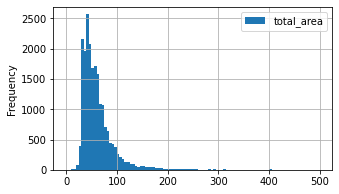

In [109]:
# изучим общую площадь
new_data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,500))
new_data['total_area'].describe()
# с помошью describe получим общее представление

Общая площадь в нашей выборке колеблется от 12 до 900 $м^2$, среднее значение 62 $м^2$, а медиана 53 $м^2$. Распределение данных соответствует распределению Пуассона.

### Жилая площадь

count    20860.000000
mean        35.117359
std         21.925732
min          2.000000
25%         20.000000
50%         30.000000
75%         42.000000
max        409.700000
Name: living_area, dtype: float64

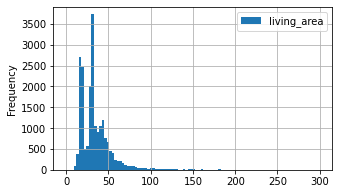

In [110]:
# изучим жилую площадь
new_data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,300))
new_data['living_area'].describe()
# с помошью describe получим общее представление

Жилая площадь в нашей выборке колеблется от 2 до 409 $м^2$, среднее значение 35 $м^2$, а медиана 30 $м^2$. Распределение данных похоже на распределение Пуассона. Но в этом распределении есть пик в районе 20 $м^2$ с последующим спадом до медианы.

### Площадь кухни

count    20860.000000
mean        10.497527
std          5.896821
min          1.300000
25%          7.100000
50%          9.000000
75%         11.600000
max        112.000000
Name: kitchen_area, dtype: float64

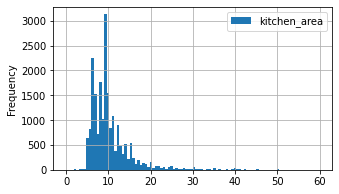

In [111]:
# изучим площадь кухни
new_data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,60))
new_data['kitchen_area'].describe()
# с помошью describe получим общее представление

Жилая площадь в нашей выборке колеблется от 1.3 до 112 $м^2$, среднее значение 10.5 $м^2$, а медиана 9 $м^2$. Распределение данных представляет собой распределение Пуассона. 

### Цена объекта

count    2.086000e+04
mean     6.929391e+06
std      1.153477e+07
min      1.219000e+04
25%      3.600000e+06
50%      4.890000e+06
75%      7.200000e+06
max      7.630000e+08
Name: last_price, dtype: float64

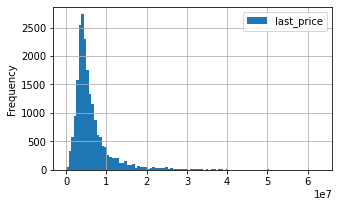

In [112]:
# изучим цены объектов
new_data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,0.630000e+08))
new_data['last_price'].describe()
# с помошью describe получим общее представление

Цена объектов недвижимости в данных лежит в пределах от 12190 до 763000000 рублей. Средняя цена - примерно 7 млн рублей, а медиана - чуть меньше 5 млн рублей. Распределение данных представляет собой распределение Пуассона.

### Количество комнат

count    20860.000000
mean         2.127325
std          1.094154
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

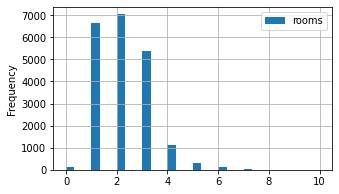

In [113]:
# изучим количество комнат
new_data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (0,10))
new_data['rooms'].describe()
# с помошью describe получим общее представление

Количество комнат в наших данных изменяется от минимального значения - 0, до 19 (максимальное). Среднее количество комнат равно 2 и совпадает с медианным значением. Распределение данных представляет собой дискретное распределение Пуассона.

### Высота потолков

count    20860.000000
mean         2.704465
std          0.249396
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.300000
Name: ceiling_height, dtype: float64

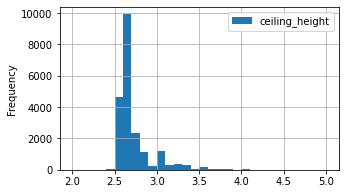

In [114]:
# изучим высоту потолков
new_data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (2,5))
new_data['ceiling_height'].describe()
# с помошью describe получим общее представление

Высота потолков в объявлениях изменяется от 1 м до чуть более 10 м, среднее значение высоты потолков - 2.7 м, а медиана отличается на 5 см и равна 2.65 м. Распределение данных представляет похоже на распределение Пуассона.

### Этаж квартиры

count    20860.000000
mean         5.625839
std          4.600043
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

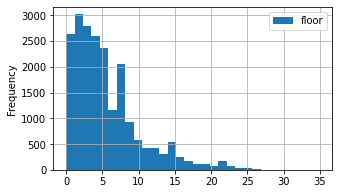

In [115]:
# изучим этаж 
new_data.plot(y = 'floor', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (0,35))
new_data['floor'].describe()
# с помошью describe получим общее представление

Этаж квартир в объявлениях изменяется от 1 до максимального значения 33, среднее значение этажа квартир - примерно 6, а медиана равна 4. Распределение данных представляет похоже на распределение Пуассона.

### Тип этажа квартиры («первый», «последний», «другой»)

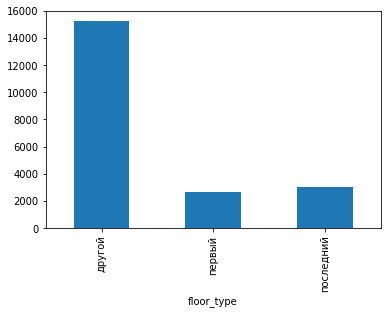

count      20860
unique         3
top       другой
freq       15244
Name: floor_type, dtype: object

In [116]:
# изучим тип этажа 
new_data.groupby(by = 'floor_type')['floor_type'].count().plot(kind='bar')
plt.show()
new_data['floor_type'].describe()
# с помошью describe получим общее представление

Категории, в которые мы объединили этажи - это "другой", "первый" и "последний". Больше всего объявлений для категории "другой", затем идёт "последний" и на последнем месте по количеству объявлений - категория "первый".

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №2__

Полученные данные соответствуют реалиям
</div>

### Общее количество этажей в доме

count    20860.000000
mean        10.191563
std          6.192242
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

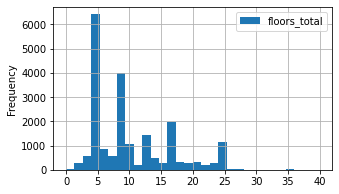

In [117]:
# изучим этаж 
new_data.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (0,40))
new_data['floors_total'].describe()
# с помошью describe получим общее представление

Общее количество этажей в доме для наших данных лежит в диапазоне от 1 до 60 этажей. Среднее количество всех этажей в доме - примерно 10, а медиана равна 9 этажам. Распределение похоже на дискретное распределение Пуассона. 

### Расстояние до центра города в метрах

count     17241.0
unique     7278.0
top        8460.0
freq         61.0
Name: cityCenters_nearest, dtype: float64

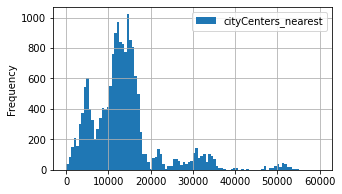

In [118]:
# изучим расстояние до центра города в метрах
new_data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (0,60000))
new_data['cityCenters_nearest'].describe()
# с помошью describe получим общее представление

In [119]:
print('Максимальное расстояние до ближайшего центра города', new_data['cityCenters_nearest'].max(), 'м.')
print('Минимальное расстояние до ближайшего центра города', new_data['cityCenters_nearest'].min(), 'м.')

Максимальное расстояние до ближайшего центра города 62706.0 м.
Минимальное расстояние до ближайшего центра города 181.0 м.


Максимальное и минимальное расстояния до центра города указаны в ячейке сверху, чаще всего встречается значение равное 8460.0 м.

### Pасстояние до ближайшего аэропорта

count     19230.0
unique     7966.0
top       47100.0
freq        398.0
Name: airports_nearest, dtype: float64

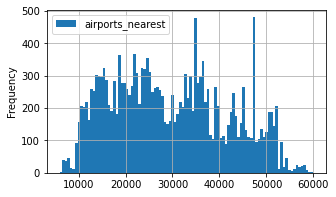

In [120]:
# изучим расстояние до ближайшего аэропорта 
new_data.plot(y = 'airports_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,3), range = (6000,60000))
new_data['airports_nearest'].describe()
# с помошью describe получим общее представление

In [121]:
print('Максимальное расстояние до ближайшего аэропорта', new_data['airports_nearest'].max(), 'м.')
print('Минимальное расстояние до ближайшего аэропорта', new_data.loc[new_data['airports_nearest']!= 0.0, 'airports_nearest'].min(), 'м.')

Максимальное расстояние до ближайшего аэропорта 176000.0 м.
Минимальное расстояние до ближайшего аэропорта 6450.0 м.


Минимальное и максимальное расстояния до аэропорта указаны в ячейке выше. Для минимального значения мы наложили условие, что оно не равно 0, потому что в аэропорту квартир не продаётся. Самое часто встречающееся расстояние до аэропорта - это 47100.0 м.

### Расстояние до ближайшего парка

count     8043.0
unique     993.0
top        441.0
freq        67.0
Name: parks_nearest, dtype: float64

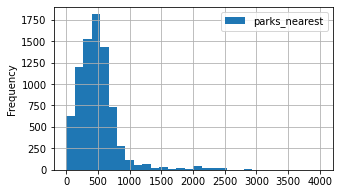

In [122]:
# изучим расстояние до ближайшего парка
new_data.plot(y = 'parks_nearest', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (1,4000))
new_data['parks_nearest'].describe()
# с помошью describe получим общее представление

In [123]:
print('Максимальное расстояние до ближайшего парка', new_data['parks_nearest'].max(), 'м.')
print('Минимальное расстояние до ближайшего парка', new_data.loc[new_data['parks_nearest']!= 0.0, 'parks_nearest'].min(), 'м.')

Максимальное расстояние до ближайшего парка 3190.0 м.
Минимальное расстояние до ближайшего парка 1.0 м.


Минимальное и максимальное расстояние до парка посчитано в ячейке сверху (с условием аналогичным условию на расстояние до ближайшего аэропорта). Самое часто встречающееся значение - это 441.0 м. Далеко не во всех объявлениях было указано расстояние до ближайшего парка.

### День и месяц публикации объявления

count    20860.000000
mean         2.562464
std          1.783766
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

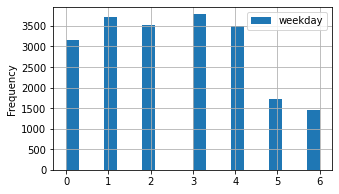

In [124]:
# изучим дни публикации объявлений
new_data.plot(y = 'weekday', kind = 'hist', bins = 20, grid=True, figsize = (5,3), range = (0,6))
new_data['weekday'].describe()
# с помошью describe получим общее представление

Из графика видно, что в рабочие дни объявлений о продаже размещалось больше, чем в выходные. Самый популярный день недели для размещения объявлений - это четверг (он же медианное значение).

count    20860.000000
mean         6.378428
std          3.487829
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

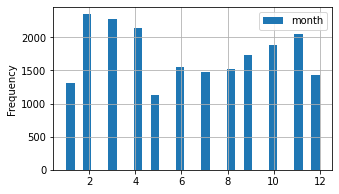

In [125]:
# изучим месяцы публикации объявлений
new_data.plot(y = 'month', kind = 'hist', bins = 30, grid=True, figsize = (5,3), range = (1,12))
new_data['month'].describe()
# с помошью describe получим общее представление

Из графика видно, что в январе и мае объявлений о продаже квартир было размещено меньше всего. Наибольшее количество объявлений было зарегистрировано с февраля по апрель с тенденцией к спаду. А с июля до ноября наблюдалась противоположная тенденция к увеличению объявлений о продаже квартир. И затем спад к декабрю. 

total_area
count    20860.000000
mean        61.925129
std         37.125229
min         12.000000
25%         41.000000
50%         53.000000
75%         71.000000
max        900.000000
Name: total_area, dtype: float64
living_area
count    20860.000000
mean        35.117359
std         21.925732
min          2.000000
25%         20.000000
50%         30.000000
75%         42.000000
max        409.700000
Name: living_area, dtype: float64
kitchen_area
count    20860.000000
mean        10.497527
std          5.896821
min          1.300000
25%          7.100000
50%          9.000000
75%         11.600000
max        112.000000
Name: kitchen_area, dtype: float64
last_price
count    2.086000e+04
mean     6.929391e+06
std      1.153477e+07
min      1.219000e+04
25%      3.600000e+06
50%      4.890000e+06
75%      7.200000e+06
max      7.630000e+08
Name: last_price, dtype: float64
rooms
count    20860.000000
mean         2.127325
std          1.094154
min          0.000000
25%          1.00000

array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>],
       [<AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'weekday'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

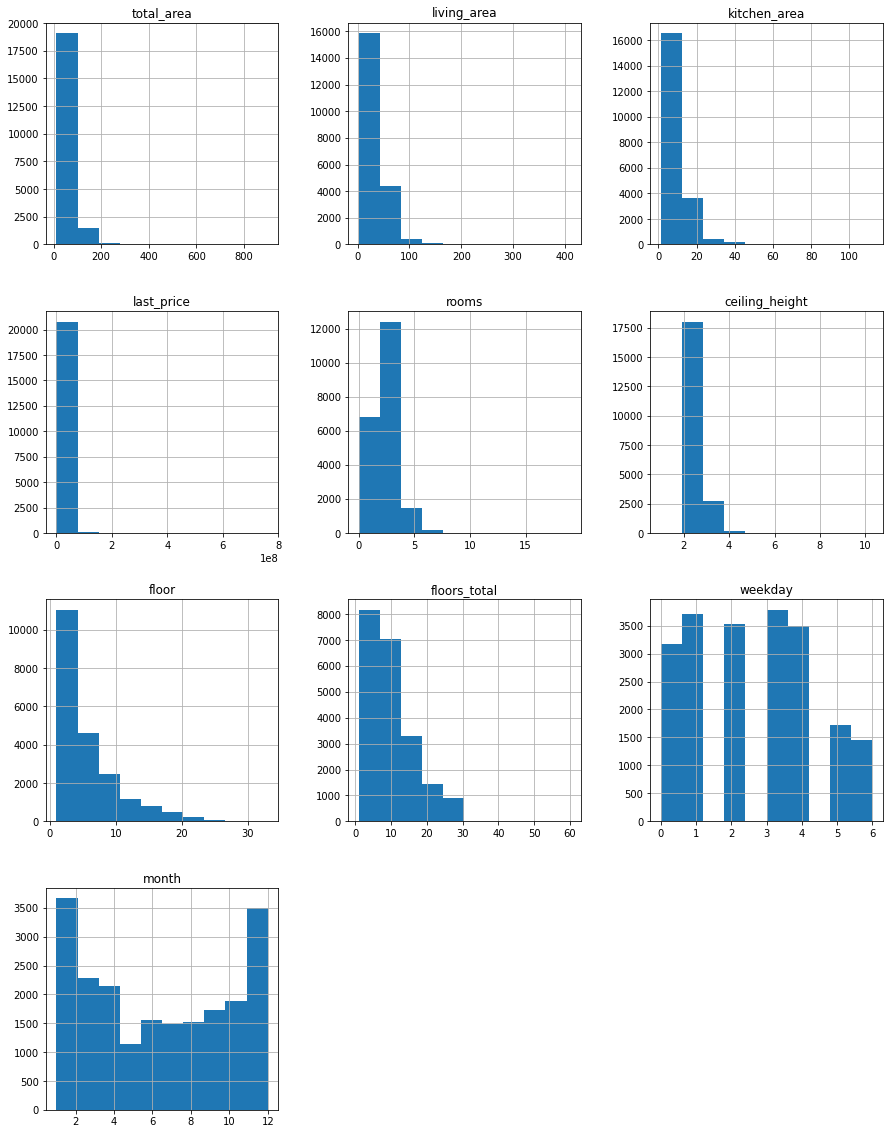

In [126]:
columns = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms',
           'ceiling_height', 'floor', 'floor_type','floors_total', 'cityCenters_nearest', 
           'airports_nearest', 'parks_nearest', 'weekday', 'month']
for col in new_data[columns]:
    print(col)
    print(new_data[col].describe())

# построим общую гистограмму для всех числовых столбцов
new_data[columns].hist(figsize=(15,20))  

# Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление

count    20524.000000
mean       180.735627
std        219.711963
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

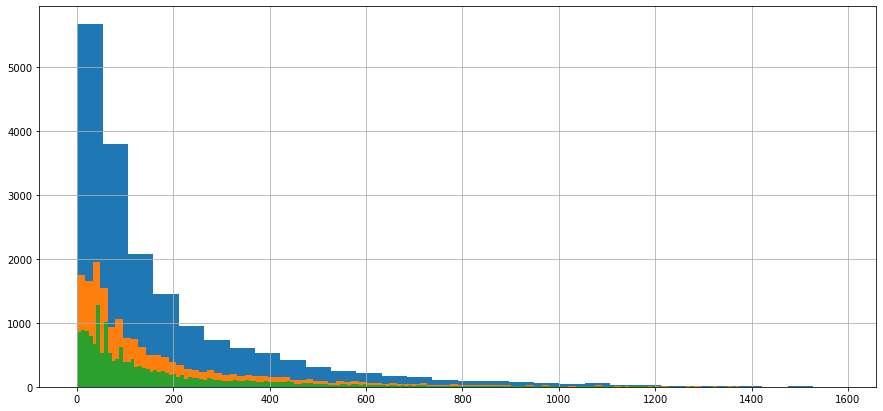

In [127]:
new_data['days_exposition'].hist(bins=30,figsize=(15,7))
new_data['days_exposition'].hist(bins=100,figsize=(15,7))
new_data['days_exposition'].hist(bins=200,figsize=(15,7))
data[data['days_exposition']!=0]['days_exposition'].describe()

Из построенных гистограмм мы видим, что у нас распределение Пуассона. Однако при увеличении количества корзин (зелёный график) мы видим явно выбивающиеся значения в районе 45 и 95. Вероятно, именно через это количество дней объявление снимается с сайта.

In [128]:
# посчитаны медианы и средние значения для столбца 'days_exposition'
median_de = new_data['days_exposition'].median()
print(median_de)
mean_de = new_data['days_exposition'].mean()
print(mean_de)
mode_de = new_data['days_exposition'].mode()
print(mode_de)
print(new_data['days_exposition'].describe())

97.0
183.84004219643552
0    45.0
dtype: object
count     18011.0
unique     1124.0
top          45.0
freq        693.0
Name: days_exposition, dtype: float64


Обычно количество дней для продажи занимает от 0 до 97 дней. Больше всего квартир было продано через 45 дней после размещения объявления. Быстрыми можно считать продажи, которые занимают меньшее количество дней, чем среднее значение по столбцу. Аномально медленные продажи - это продажи, на которые ушло больше 600 дней.

# Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

## Зависимость цены от общей площади

             total_area
last_price             
12190.0      109.000000
430000.0      30.400000
440000.0      40.000000
450000.0      39.466667
470000.0      40.833333
...                 ...
300000000.0  618.000000
330000000.0  190.000000
401300000.0  401.000000
420000000.0  900.000000
763000000.0  400.000000

[2738 rows x 1 columns]
0.6546910542477895


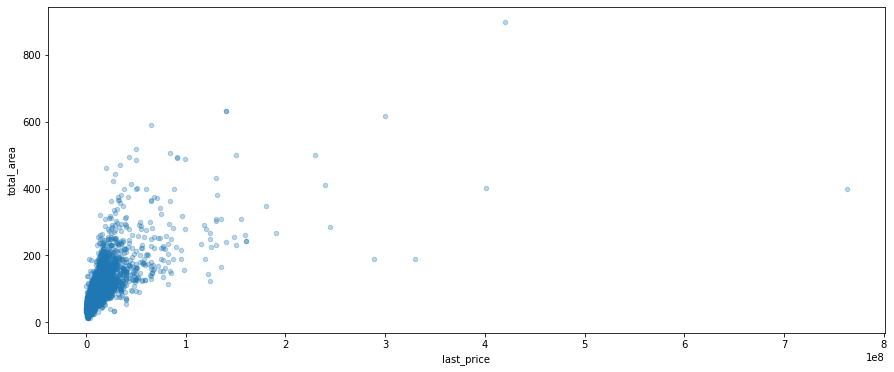

In [129]:
price_area = new_data.pivot_table(index = 'last_price',
               values='total_area')
print(price_area)
new_data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.3, figsize=(15, 6)) 
corr_price_area = new_data['last_price'].corr(new_data['total_area'])
print(corr_price_area)

Существует практически прямая зависимость стоимости недвижимости от общей площади продаваемого объекта. Коэффициент корреляции равен 0.6546910542477895.

## Зависимость цены от жилой площади

             living_area
last_price              
12190.0        32.000000
430000.0       16.000000
440000.0       30.000000
450000.0       25.866667
470000.0       30.000000
...                  ...
300000000.0   258.000000
330000000.0    95.000000
401300000.0   204.000000
420000000.0   409.700000
763000000.0   250.000000

[2738 rows x 1 columns]
0.5409007824968567


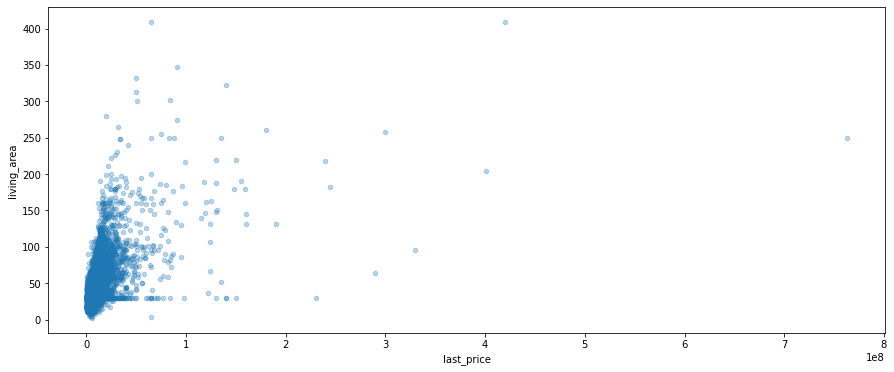

In [130]:
price_living = new_data.pivot_table(index = 'last_price',
               values='living_area')
print(price_living)
new_data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.3, figsize=(15, 6)) 
corr_price_living = new_data['last_price'].corr(new_data['living_area'])
print(corr_price_living)

Чуть менее очевидна зависимость цены недвижимости от жилой площади. Коэффициент корреляции = 0.5409007824968567.

## Зависимость цены от площади кухни

             kitchen_area
last_price               
12190.0         40.500000
430000.0         6.000000
440000.0         9.000000
450000.0         7.666667
470000.0         8.500000
...                   ...
300000000.0     70.000000
330000000.0     40.000000
401300000.0     24.000000
420000000.0    112.000000
763000000.0     40.000000

[2738 rows x 1 columns]
0.4692973800426118


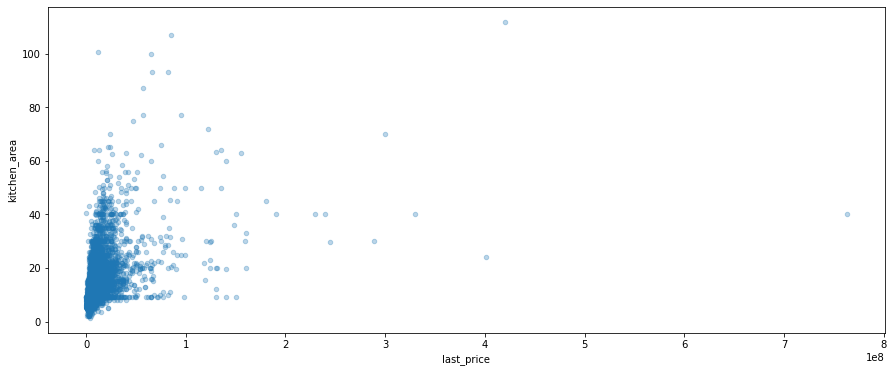

In [131]:
price_kitchen = new_data.pivot_table(index = 'last_price',
               values='kitchen_area')
print(price_kitchen)
new_data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.3, figsize=(15, 6)) 
corr_price_kitchen = new_data['last_price'].corr(new_data['kitchen_area'])
print(corr_price_kitchen)

Связь между стоимостью недвижимости и площадью кухни есть, потому что коэффициент корреляции = 0.4692973800426118.

## Зависимость цены от количества комнат

                 rooms
last_price            
12190.0       2.000000
430000.0      1.000000
440000.0      1.000000
450000.0      1.666667
470000.0      1.333333
...                ...
300000000.0   7.000000
330000000.0   3.000000
401300000.0   5.000000
420000000.0  12.000000
763000000.0   7.000000

[2738 rows x 1 columns]
0.36254395250347476


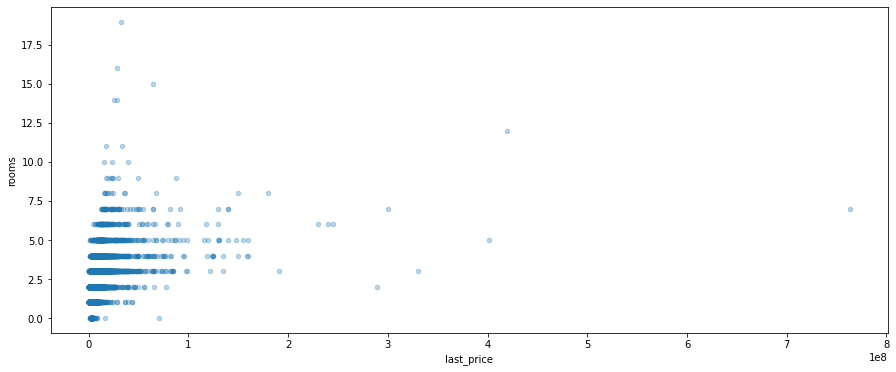

In [132]:
price_rooms = new_data.pivot_table(index = 'last_price',
               values='rooms')
print(price_rooms)
new_data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.3, figsize=(15, 6)) 
corr_price_rooms = new_data['last_price'].corr(new_data['rooms'])
print(corr_price_rooms)

По значению коэффициента корреляции можно сказать, что зависимость между количеством комнат и стоимостью жилья определённо есть.

<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Зависимости прерывных данных (тип этажа, месяц, комнаты) лучше рассмотреть на линейной или столбчатой диаграмме (сгруппировав предварительно)
</div>

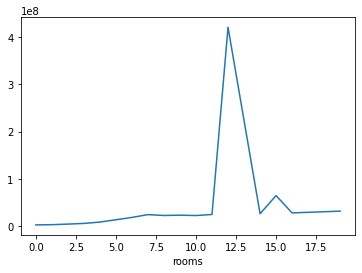

In [133]:
new_data.groupby('rooms')['last_price'].median().plot();

Как видно из графика чем ближе количество комнат будет к 12, тем больше стоимость недвижимости. Однако такие предложения, наверняка, редки. Поэтому наложим дополнительные ограничения на количество объявлений (больше 50), и посмотрим, как изменится график.

0.36254395250347476

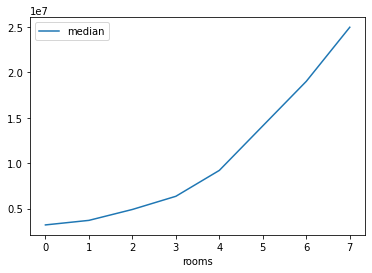

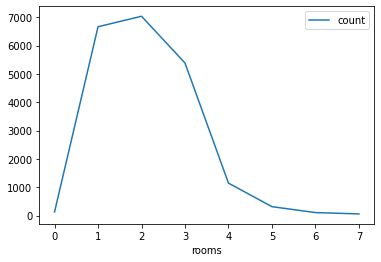

In [134]:
rooms = new_data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
rooms.columns = ['mean', 'count', 'median']
rooms.query('count > 50').plot(y = 'median')
rooms.query('count > 50').plot(y = 'count')
new_data['rooms'].corr(new_data['last_price'])

Как мы и предполагали основные предложения на рынке недвижимости составляют объявления о продаже 1-, 2- или 3-комнатных квартир (2 график). А на первом графике мы можем увидеть, что с ростом числа комнат, растёт и цена недвижимости. Коэффициент корреляции говорит о том, что зависимость между числом комнат и ценой на квартиры есть.

## Зависимость цены от типа этажа, на котором расположена квартира

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20860 entries, 0 to 23697
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20860 non-null  int64         
 1   last_price            20860 non-null  float64       
 2   total_area            20860 non-null  float64       
 3   first_day_exposition  20860 non-null  datetime64[ns]
 4   rooms                 20860 non-null  int64         
 5   ceiling_height        20860 non-null  float64       
 6   floors_total          20860 non-null  int64         
 7   living_area           20860 non-null  float64       
 8   floor                 20860 non-null  int64         
 9   is_apartment          20860 non-null  bool          
 10  studio                20860 non-null  bool          
 11  open_plan             20860 non-null  bool          
 12  kitchen_area          20860 non-null  float64       
 13  balcony         

,mean,count,median
,last_price,last_price,last_price
floor_type,,,
другой,7.085986e+06,15244,5100000.0
первый,5.003646e+06,2617,4000000.0
последний,7.813866e+06,2999,4500000.0


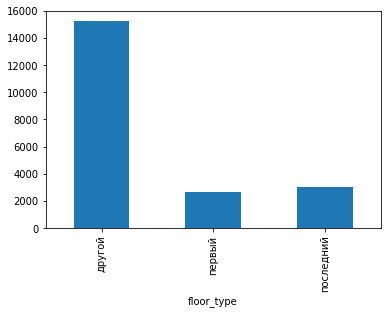

In [135]:
new_data['floor_type'] = new_data['floor_type'].astype('category')
print(new_data.info())
new_data.groupby(by = 'floor_type')['floor_type'].count().plot(
    kind='bar')

price_floor = new_data.pivot_table(
    index = 'floor_type', 
    values = 'last_price', 
    aggfunc = ['mean', 'count', 'median']
)
price_floor

,mean,count,median
,last_price,last_price,last_price
floor_type,,,
другой,7.085986e+06,15244,5100000.0
первый,5.003646e+06,2617,4000000.0
последний,7.813866e+06,2999,4500000.0


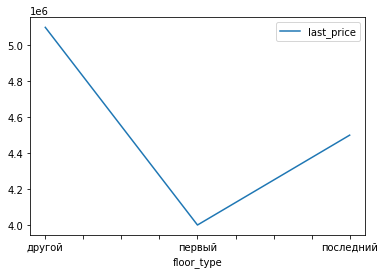

In [136]:
price_floor = new_data.pivot_table(
    index = 'floor_type', 
    values = 'last_price', 
    aggfunc = ['mean', 'count', 'median']
)
price_floor.plot(y = 'median')
price_floor

Из графика видно, что недвижимость, находящаяся на первом этаже стабильно стоит меньше, чем квартиры на последнем ии другом этаже. Поэтому зависимость между категорией этажа и ценой в объявлениях определённой существует.

## Зависимость цены от даты размещения

             weekday
last_price          
12190.0          2.0
430000.0         0.0
440000.0         1.0
450000.0         3.0
470000.0         4.0
...              ...
300000000.0      0.0
330000000.0      2.0
401300000.0      5.0
420000000.0      2.0
763000000.0      5.0

[2738 rows x 1 columns]
0.00238603361776021


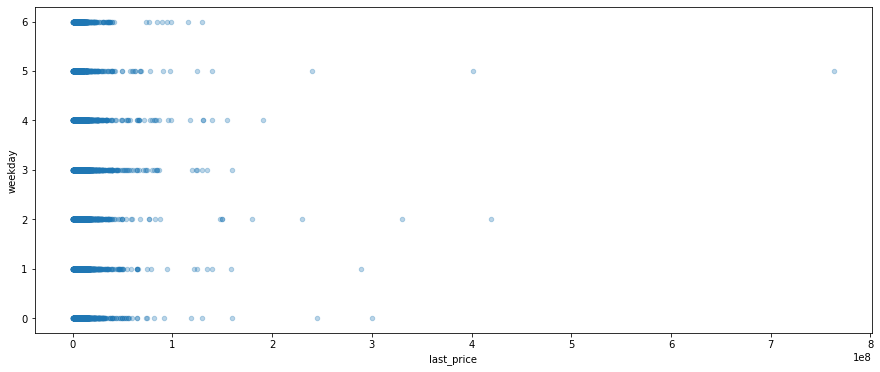

In [137]:
# день недели
price_weekday = new_data.pivot_table(index = 'last_price',
               values='weekday')
print(price_weekday)
new_data.plot(x='last_price', y='weekday', kind='scatter', alpha=0.3, figsize=(15, 6)) 
corr_price_weekday = new_data['last_price'].corr(new_data['weekday'])
print(corr_price_weekday)

0.00238603361776021

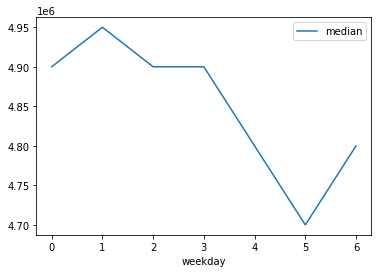

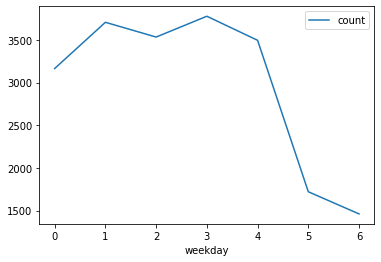

In [138]:
weekday = new_data.pivot_table(index = 'weekday', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
weekday.columns = ['mean', 'count', 'median']
weekday.plot(y = 'median')
weekday.plot(y = 'count')
new_data['weekday'].corr(new_data['last_price'])

Зависимость между ценой недвижимости и днём недели, судя по коэффициенту корреляции, нет. Единственное, что стоит отметить, что цена квартир, размещённых на сайте в субботу, оказалось наименьшим по сравнению с остальными днями недели. Максимальная цена оказывается во вторник.

                 month
last_price            
12190.0       3.000000
430000.0      4.000000
440000.0      7.000000
450000.0      5.666667
470000.0      3.666667
...                ...
300000000.0  12.000000
330000000.0   4.000000
401300000.0   2.000000
420000000.0  12.000000
763000000.0   9.000000

[2738 rows x 1 columns]
0.004057910538821268


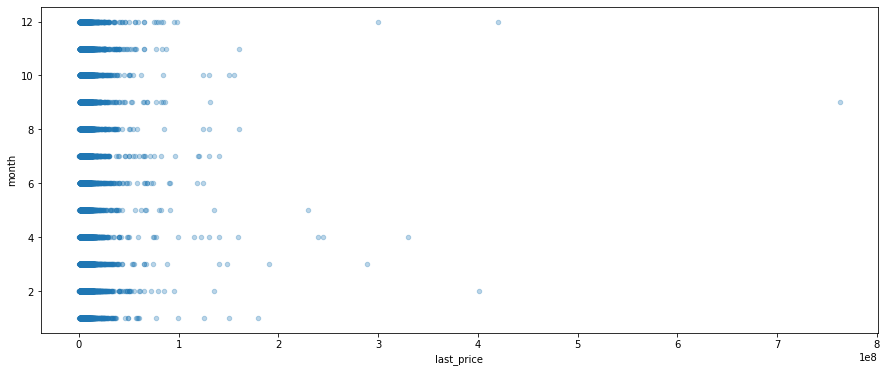

In [139]:
# месяц
price_month = new_data.pivot_table(index = 'last_price',
               values='month')
print(price_month)
new_data.plot(x='last_price', y='month', kind='scatter', alpha=0.3, figsize=(15, 6)) 
corr_price_month = new_data['last_price'].corr(new_data['month'])
print(corr_price_month)

0.004057910538821268

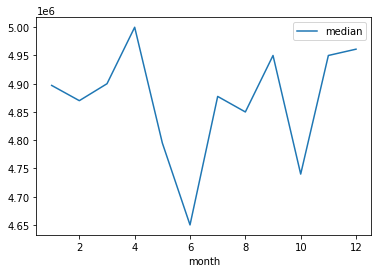

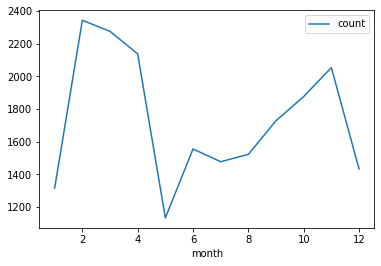

In [140]:
month = new_data.pivot_table(index = 'month', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
month.columns = ['mean', 'count', 'median']
month.plot(y = 'median')
month.plot(y = 'count')
new_data['month'].corr(new_data['last_price'])

Зависимость между ценой недвижимости и месяцем, судя по коэффициенту корреляции, опять-таки нет. Максимальные цены для недвижимости оказались апреле, наименьшее - в июне. Также можно увидеть ещё один спад в ценах на квартиры, если объявления были размещеныв октябре. 

In [141]:
print(new_data['year'].min(), new_data['year'].max())

2014 2019


               year
last_price         
12190.0      2019.0
430000.0     2019.0
440000.0     2018.0
450000.0     2018.0
470000.0     2018.0
...             ...
300000000.0  2017.0
330000000.0  2018.0
401300000.0  2016.0
420000000.0  2017.0
763000000.0  2017.0

[2738 rows x 1 columns]
-0.04211412995825303
12542827.107692307
8916829.824165916
7198498.199919872
6966420.932505176
6333810.710894621
7109483.314814814


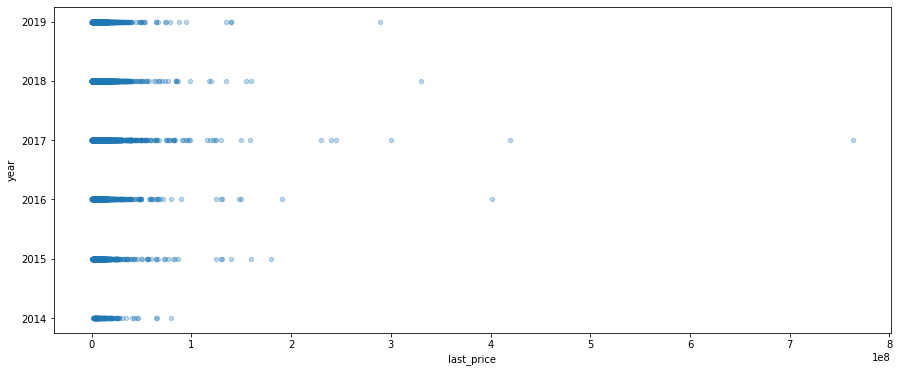

In [142]:
# год
price_year = new_data.pivot_table(index = 'last_price',
               values='year')
print(price_year)
new_data.plot(x='last_price', y='year', kind='scatter', alpha=0.3, figsize=(15, 6)) 
corr_price_year = new_data['last_price'].corr(new_data['year'])
print(corr_price_year)
mean_2014 = new_data['last_price'].loc[new_data['year'] == 2014].mean()
print(mean_2014)
mean_2015 = new_data['last_price'].loc[new_data['year'] == 2015].mean()
print(mean_2015)
mean_2016 = new_data['last_price'].loc[new_data['year'] == 2016].mean()
print(mean_2016)
mean_2017 = new_data['last_price'].loc[new_data['year'] == 2017].mean()
print(mean_2017)
mean_2018 = new_data['last_price'].loc[new_data['year'] == 2018].mean()
print(mean_2018)
mean_2019 = new_data['last_price'].loc[new_data['year'] == 2019].mean()
print(mean_2019)

Как видно из коэффициентов корреляции для столбцов дня, месяца и года размещения объявления, никакой зависимости от цены нет.

-0.04211412995825303

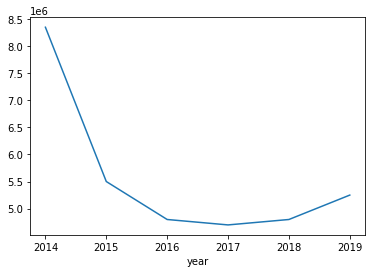

In [143]:
new_data.groupby('year')['last_price'].median().plot();
new_data['year'].corr(new_data['last_price'])

Зависимость между ценой недвижимости и годом, исходя из коэффициента корреляции, очень мала. Максимальные цены для недвижимости оказались в 2014, а далее наблюдается некоторый спад, и минимум достигается в 2017 году. Однако потом наблюдается снова рост в ценах на недвижимость.

## Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [144]:
loc_meter = new_data.pivot_table(index = 'locality_name', values = '1meter_cost', aggfunc=['count', 'mean'])
loc_meter.columns = ['count', 'mean']
loc_meter = loc_meter.sort_values('count', ascending = False).head(10)
print(loc_meter)
#самая высокая стоимость
print(loc_meter[loc_meter['mean']==loc_meter['mean'].max()])
#самая низкая стоимость
print(loc_meter[loc_meter['mean']==loc_meter['mean'].min()])

                         count           mean
locality_name                                
Санкт-Петербург          15732  114806.115980
Всеволожск                 398   68654.473986
Пушкин                     369  103125.819291
Колпино                    338   75424.579098
Гатчина                    306   68757.678644
Выборг                     237   58141.909153
Петергоф                   201   84757.559690
Сестрорецк                 183  101757.616875
Красное Село               178   72148.588289
деревня Новое Девяткино    144   76136.763167
                 count          mean
locality_name                       
Санкт-Петербург  15732  114806.11598
               count          mean
locality_name                     
Выборг           237  58141.909153


<div class="alert alert-block alert-warning">📝
    

__Комментарий от ревьюера №1__

Таблица верна. Совет: на общие продажи лучше смотреть через призму медианы. Она более устойчива к выбросам
</div>

In [145]:
#добавила столбец с медианой
loc_meter = new_data.pivot_table(index = 'locality_name', values = '1meter_cost', aggfunc=['count', 'mean', 'median'])
loc_meter.columns = ['count', 'mean', 'median']
loc_meter = loc_meter.sort_values('count', ascending = False).head(10)
print(loc_meter)
#самая высокая стоимость
print(loc_meter[loc_meter['median']==loc_meter['median'].max()])
#самая низкая стоимость
print(loc_meter[loc_meter['median']==loc_meter['median'].min()])

                         count           mean         median
locality_name                                               
Санкт-Петербург          15732  114806.115980  104761.904762
Всеволожск                 398   68654.473986   65789.473684
Пушкин                     369  103125.819291  100000.000000
Колпино                    338   75424.579098   74723.748474
Гатчина                    306   68757.678644   67860.569236
Выборг                     237   58141.909153   58158.319871
Петергоф                   201   84757.559690   82142.857143
Сестрорецк                 183  101757.616875   99678.456592
Красное Село               178   72148.588289   71786.041672
деревня Новое Девяткино    144   76136.763167   74274.685453
                 count          mean         median
locality_name                                      
Санкт-Петербург  15732  114806.11598  104761.904762
               count          mean        median
locality_name                                   
Выборг        

## Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра.

In [146]:
new_data['city_Center_km'] = new_data['cityCenters_nearest'] / 1000
new_data['city_Center_km'] = new_data['city_Center_km'].fillna(1000000)
new_data['city_Center_km'] = new_data['city_Center_km'].astype(int)
loc_km = new_data.query('locality_name == "Санкт-Петербург" and city_Center_km !=1000000').pivot_table(
    index = 'city_Center_km', values = '1meter_cost', aggfunc = 'mean'
)
print(loc_km)

                  1meter_cost
city_Center_km               
0               187324.130319
1               166442.183762
2               146662.860056
3               129407.432193
4               137241.835279
5               146979.232519
6               152277.893519
7               141399.731456
8               119737.235343
9               110002.892041
10              111642.780276
11              106790.883882
12              108297.039254
13              107232.541760
14              104986.483351
15              101928.340531
16              100106.602382
17               93938.460917
18               94831.953162
19               95434.377295
20              107108.469252
21               91492.688149
22               88714.696974
23               92720.641577
24               82440.343912
25               91136.018511
26               75171.911041
27              132115.709459
28               81840.638722
29               62482.404228


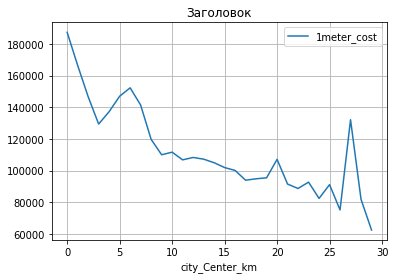

In [148]:
# линейная диаграмма по этой таблице
loc_km.plot(grid = True, title = 'Заголовок');

Стоимость 1 метра квадратного недвжимости тем дороже, чем ближе недвижимость к центру (от 0 до 3 км). Далее цена 1 метра недвижимости начинает возрастать (до 6 км), а затем постепенно спадает до 19 км. Затем мы видим новый всплеск в росте стоимости 1 метра недвижимости в 20 км от центра и постепенный спад до 26 км. И значение стоимости 1 метра недвижимости в 27 км от центра города даже больше, чем в 8 км от центра.

### Общий вывод

В этом проекте мы исследовали базу данных сервиса Яндекс.Недвижимость. Перед нами стояла задача обработать архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов c 2014 до 2019 и провести его анализ.\
Мы рассчитали цену 1 квадратного метра жилья и добавили в таблицу, вывели дни недели, месяцы и годы размещения объявлений из столбца даты и добавили категории недвижимости по этажам. Изучили значения площади, цены, числа комнат и высоты потолков на аномалии и выбросили выбивающиеся строки из данных. При изучении времени продажи квартир было найдено, что большое количество объявлений, вероятно, было снято с сайта. Поэтому среднее значение для этого столбца будет немного отличатся от посчитанного с учётом снятия объявлений.\
Также было показано, что на стоимость недвижимости больше всего влияют общая площадь, жилая площадь и площадь кухни. Чуть меньше на стоимость влияет количество комнат. Совсем не влияют на стоимость недвижимости день, месяц и год размещения. Нужно учитывать, что в 2014-2018 годах стоимость недвижимости в среднем снижалась. Но в 2018 году стоимость недвижимости снова возрасла. \
Цена одного квадратного метра дороже всего стоит в Санкт-Петербурге, а дешевле всего - в Выборге (из числа населённых пуктов с наибольшим количеством объявлений). Стоимость 1 квадратного метра в Санкт-Петербурге зависит от близости к центру: дороже всего - в самом центре, а далее на некотором отдалении от центра (6, 10, 20 и 27 км) наблюдается рост цены 1 метра.

В процессе исследования данных мы осуществили их предобработку: нашли  и усранили явные дубликаты, обработали пропуски в большинстве столбцов, где это возможно, заменили эти значения из общих соображений, где это было невозможно, заменили на медианные значения или оставили без изменений. 

Избавились от неявных дубликатов в столбце locality_name. Изменили типы данных, добавили новые столбцы: weekday, month, year, тип этажа, расстояние до центра в км и цену 1 $м^2$. 

Были описаны и проанализированы зависимости цены недвижимости от нескольких параметров. Изучили какие параметры в большей степени влияют на полную цену объекта. Была рассчитана средняя цена 1 $м^2$ в 10 населённых пунктах с наибольшим числом объявлений, а также средняя цена 1 $м^2$ в зависимоти от расстояния от центра гоорда для Санкт-Петербурга.